**Исследование объявлений о продаже квартир** <br>
На основе данных сервиса Яндекс.Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет - определим рыночную стоимость объектов недвижимости и установим основные параметры, влияющие на данную стоимость. Считаем, что найденные параметра далее лягут в основу алгоритмов автоматизированной системы, позволяющей отслеживать данные с аномалией и маркеры возможной мошеннической деятельности. 


<a name="contents"><br/>
**Содержание**<br/>
[**1. Изучение данных из представленного файла данных**](#chapter_1)<br/>
[**2. Изучение данных конкретных столбцов и предобработка данных**](#chapter_2)<br/>
[**3. Исследовательский анализ данных**](#chapter_3)<br/>
[**4. Выводы**](#chapter_4)

<a name="chapter_1"></a>
## 1. Изучение данных из представленного файла данных

<a name="chapter_1.1"></a>
**1.1. Выставление окружения и импорт библиотек.**

1.1.1. Вначале посмотрим окружение тренажера Яндекс.Практикума с помощью команды ` !conda list -e ` и получаем такой результат по необходимым нам библиотекам:

matplotlib=3.1.0=pypi_0

matplotlib-inline=0.1.2=pyhd8ed1ab_2

pandas=0.25.1=pypi_0


1.1.2. Смотрим окружение на своей локальной машине:

In [1]:
!conda list -e

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: win-64
_ipyw_jlab_nb_ext_conf=0.1.0=py38_0
alabaster=0.7.12=pyhd3eb1b0_0
anaconda=2021.05=py38_0
anaconda-client=1.7.2=py38_0
anaconda-navigator=2.0.3=py38_0
anaconda-project=0.9.1=pyhd3eb1b0_1
anyio=2.2.0=py38haa95532_2
appdirs=1.4.4=py_0
argh=0.26.2=py38_0
argon2-cffi=20.1.0=py38h2bbff1b_1
asn1crypto=1.4.0=py_0
astroid=2.5=py38haa95532_1
astropy=4.2.1=py38h2bbff1b_1
async_generator=1.10=pyhd3eb1b0_0
atomicwrites=1.4.0=py_0
attrs=20.3.0=pyhd3eb1b0_0
autopep8=1.5.6=pyhd3eb1b0_0
babel=2.9.0=pyhd3eb1b0_0
backcall=0.2.0=pyhd3eb1b0_0
backports=1.0=pyhd3eb1b0_2
backports.functools_lru_cache=1.6.4=pyhd3eb1b0_0
backports.shutil_get_terminal_size=1.0.0=pyhd3eb1b0_3
backports.tempfile=1.0=pyhd3eb1b0_1
backports.weakref=1.0.post1=py_1
bcrypt=3.2.0=py38he774522_0
beautifulsoup4=4.9.3=pyha847dfd_0
bitarray=1.9.2=py38h2bbff1b_1
bkcharts=0.2=py38_0
black=19.10b0=py_0
blas=1.0=mkl
blea

matplotlib=3.3.4=py38haa95532_0

matplotlib-base=3.3.4=py38h49ac443_0

pandas=1.3.2=pypi_0

Понятно, что на локальной машины версии новее, но тонкости мне еще не совсем понятны ))

1.1.3. Делаем импорт библиотек, используемых в курсе, и сделаем запрос на обновление основной библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

import copy #импорт библиотеки по копированию Источник: https://pythononline.ru/osnovy/modul-copy-python


In [3]:
!pip install pandas -U

1.1.4. На прошлом самостоятельном проекте мне посоветовали больше пользоваться функцией display, разберемся.

Корректируем вывод табличных данных с помощью функции set_option() в Pandas

In [4]:
#pd.set_option('max_rows', 5) # поставим ограничение на вывод 5 строк https://habr.com/ru/post/521894/
pd.set_option('display.max_columns', None) # снимаем ограничение на отображение колонок
pd.set_option('display.float_format', '{:.2f}'.format) # ставим ограничение на количество выводимых знаков у float 

**1.2. Импортируем основной файл данных локально и применяем кострукцию except для тренажера**

In [5]:
try:
    data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/real_estate_data.csv', sep='\t') # разделители пробелы
except FileNotFoundError as e:                                      # прочитать бы до конца https://ru.hexlet.io/courses/advanced_python/lessons/python_exceptions/theory_unit
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # и назначаем столбец, что будет индексным  https://smysl.io/blog/pandas/

In [6]:
data.info() # смотрим общую информацию о файле и его структуре

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data.describe(include='all') # include='all' - включить все колонки, описание функции https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699,23699.00,14504.00,23613.00,21796.00,23699.00,2775,23699,23699,21421.00,12180.00,23650,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,23550,23632,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.86,6541548.77,60.35,NaN,2.07,2.77,10.67,34.46,5.89,NaN,NaN,NaN,10.57,1.15,NaN,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,NaN,1.08,1.26,6.60,22.03,4.89,NaN,NaN,NaN,5.91,1.07,NaN,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,NaN,0.00,1.00,1.00,2.00,1.00,NaN,NaN,NaN,1.30,0.00,NaN,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,NaN,1.00,2.52,5.00,18.60,2.00,NaN,NaN,NaN,7.00,0.00,NaN,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,NaN,2.00,2.65,9.00,30.00,4.00,NaN,NaN,NaN,9.10,1.00,NaN,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,NaN,3.00,2.80,16.00,42.30,8.00,NaN,NaN,NaN,12.00,2.00,NaN,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23699.00,6541548.77,10887013.27,12190.00,3400000.00,4650000.00,6800000.00,763000000.00
total_area,23699.00,60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,23699.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,14504.00,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,23613.00,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,21796.00,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,23699.00,5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,21421.00,10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,12180.00,1.15,1.07,0.00,0.00,1.00,2.00,5.00


In [9]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [10]:
data.sample(10) # рандомно посмотрим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21434,20,8865000.00,104.50,2018-05-17T00:00:00,4,3.00,5.00,72.20,3,NaN,False,False,9.40,NaN,Санкт-Петербург,43263.00,8390.00,2.00,566.00,0.00,NaN,169.00
6143,11,4300000.00,50.30,2018-02-26T00:00:00,2,2.54,9.00,NaN,8,NaN,False,False,6.90,NaN,Санкт-Петербург,29338.00,11270.00,1.00,584.00,0.00,NaN,108.00
8629,13,4699000.00,34.00,2019-01-14T00:00:00,1,2.75,19.00,17.10,7,False,False,False,9.01,2.00,Санкт-Петербург,18625.00,17628.00,0.00,NaN,2.00,108.00,75.00
18607,18,12900000.00,155.00,2016-02-03T00:00:00,3,NaN,21.00,105.00,21,NaN,False,False,20.00,NaN,Санкт-Петербург,13275.00,12071.00,0.00,NaN,0.00,NaN,778.00
212,0,10018000.00,82.00,2015-01-29T00:00:00,3,NaN,23.00,47.00,9,NaN,False,False,13.00,1.00,Санкт-Петербург,9655.00,13255.00,1.00,980.00,1.00,1093.00,543.00
6719,11,5500000.00,62.00,2015-11-03T00:00:00,2,NaN,5.00,40.00,5,NaN,False,False,NaN,0.00,Санкт-Петербург,21132.00,1572.00,2.00,447.00,2.00,303.00,733.00
4188,5,4300000.00,31.10,2019-04-25T00:00:00,1,2.50,5.00,17.00,3,NaN,False,False,6.50,1.00,Санкт-Петербург,39989.00,9249.00,1.00,614.00,0.00,NaN,7.00
21480,4,5318994.00,48.10,2018-06-09T00:00:00,1,NaN,3.00,NaN,3,NaN,False,False,16.80,NaN,Санкт-Петербург,45767.00,21700.00,0.00,NaN,1.00,576.00,275.00
22044,17,8200000.00,70.00,2016-06-21T00:00:00,2,2.77,25.00,40.20,3,NaN,False,False,12.00,0.00,Санкт-Петербург,44382.00,16921.00,0.00,NaN,0.00,NaN,176.00
20218,12,3950000.00,56.00,2018-02-20T00:00:00,2,2.70,16.00,26.80,7,NaN,False,False,19.90,1.00,деревня Колтуши,NaN,NaN,NaN,NaN,NaN,NaN,197.00


1.2.1. Проверим структуру столбцов нашей таблицы

In [11]:
display(data.columns) # названия столбцов нашего файла

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**1.3. Проверим таблицу на присутствие дубликатов строк. Для представления выведем данные строки, сортируя по столбцу 'last_price'**
Функция .duplicated была выбрана по причине своей работы по всему списку столбцов с вариациями по параметру keep - что позволяет рассмотреть визуально совпадающие строки.

In [12]:
data.loc[data.duplicated(keep=False)].sort_values('last_price') # keep='False' смотрим повторы
#http://espressocode.top/python-pandas-dataframe-duplicated/ https://zen.yandex.ru/media/id/5ee6f73b7c

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Полных дубликатов не наблюдается, что хорошо. Но хотелось бы посмотреть на это без учета столбцов с датами. Возможен механизм постановки объектов повторно, без проверки предварительной проверки наличия уже имеющегося данного объекта в базе недвижимости. Попробуем убрать эти два столбца: days_exposition — сколько дней было размещено объявление (от публикации до снятия) и first_day_exposition — дата публикации.

In [13]:
data_2 = data.copy() # по умолчанию pandas именно deepcopy и делает, проверили правильность совета ревьюера Алексея Тюрина. Он полностью прав ))
#data_2 = copy.deepcopy(data)
data_2 = data_2.drop(['days_exposition', 'first_day_exposition'], axis = 1) # удалим столбцы
data_2.info()
#data_2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_images         23699 non-null  int64  
 1   last_price           23699 non-null  float64
 2   total_area           23699 non-null  float64
 3   rooms                23699 non-null  int64  
 4   ceiling_height       14504 non-null  float64
 5   floors_total         23613 non-null  float64
 6   living_area          21796 non-null  float64
 7   floor                23699 non-null  int64  
 8   is_apartment         2775 non-null   object 
 9   studio               23699 non-null  bool   
 10  open_plan            23699 non-null  bool   
 11  kitchen_area         21421 non-null  float64
 12  balcony              12180 non-null  float64
 13  locality_name        23650 non-null  object 
 14  airports_nearest     18157 non-null  float64
 15  cityCenters_nearest  18180 non-null 

И проверим снова на дубликаты, уже без двух столбцов.

In [14]:
data_2.loc[data_2.duplicated(keep=False)].sort_values('last_price') # keep='False' смотрим повторы

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
9661,1,2533531.00,42.50,1,2.56,18.00,19.80,7,False,False,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN
9886,1,2533531.00,42.50,1,2.56,18.00,19.80,7,False,False,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN


Нашли - всего два варианта. Пока запомним и подумаем. Для 23699 вариантов - не так и плохо ))

In [15]:
data_2 = data_2.drop(['total_images', 'last_price'], axis = 1) # удалим столбцы
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_area           23699 non-null  float64
 1   rooms                23699 non-null  int64  
 2   ceiling_height       14504 non-null  float64
 3   floors_total         23613 non-null  float64
 4   living_area          21796 non-null  float64
 5   floor                23699 non-null  int64  
 6   is_apartment         2775 non-null   object 
 7   studio               23699 non-null  bool   
 8   open_plan            23699 non-null  bool   
 9   kitchen_area         21421 non-null  float64
 10  balcony              12180 non-null  float64
 11  locality_name        23650 non-null  object 
 12  airports_nearest     18157 non-null  float64
 13  cityCenters_nearest  18180 non-null  float64
 14  parks_around3000     18181 non-null  float64
 15  parks_nearest        8079 non-null  

In [16]:
data_2.loc[data_2.duplicated(keep=False)].sort_values('total_area')

,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
12873,31.00,1,NaN,5.00,NaN,2,NaN,False,False,NaN,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN
8660,31.00,1,NaN,5.00,NaN,2,NaN,False,False,NaN,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN
13896,38.00,1,NaN,22.00,18.00,5,NaN,False,False,10.00,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN
3634,38.00,1,NaN,22.00,18.00,5,NaN,False,False,10.00,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN
452,42.00,2,NaN,5.00,29.00,3,NaN,False,False,6.00,1.00,Выборг,NaN,NaN,NaN,NaN,NaN,NaN
1376,42.00,2,NaN,5.00,29.00,3,NaN,False,False,6.00,1.00,Выборг,NaN,NaN,NaN,NaN,NaN,NaN
9886,42.50,1,2.56,18.00,19.80,7,False,False,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN
9661,42.50,1,2.56,18.00,19.80,7,False,False,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN
19972,62.40,2,NaN,24.00,33.10,21,NaN,False,False,8.20,0.00,NaN,22041.00,17369.00,0.00,NaN,1.00,374.00
2632,62.40,2,NaN,24.00,33.10,21,NaN,False,False,8.20,0.00,NaN,22041.00,17369.00,0.00,NaN,1.00,374.00


In [17]:
len(data_2.loc[data_2.duplicated(keep=False)])

30

А без 'total_images', 'last_price' таких вариантов еще 30.

 **1.4. Описание данных, начальное.**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах(м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

Давайте отсмотрим каждый столбец в отдельности.

**1.5. Краткие выводы по структуре:**
    
- Всего 23699 строк, 22 столбца. Разделители - `\t` и судя по отсутствию столбцов с непонятными названиями - ошибок с разделителями нет. Названия столбцов без пропусков и артефактов,  один cityCenters_nearest с символом в верхнем регистре.

- Нашли всего 2 строки, дублирующие друг друга, несовпадение по дате.

- Просится изменение названия столбцов, там где указывается расстояние или площадь. К первым бы добавил в название km и пересчитал в километры. Ко второй группе добавил бы m2. И не знаю, принято ли это в мире аналитики данных (в части, связанной с Python), но порядок расположения столбцов тоже хотелось бы изменить - сейчас слева в любой выдаче на экране находятся второстепенные столбцы. Лучше бы сделать аналогично, как делает сам проект Яндекс.Недвижимости, смотрим https://realty.yandex.ru/moskva/kupit/kvartira/

- Много пропусков данных, особенно во второстепенных столбцах. 

- В некоторых столбцах есть заведомо некоррректные данные. living_area, равная 2 кв.м. или kitchen_area равная 1.3 кв.м. или объекты, находящиеся по данным прямо в аэропорту или парке. И это надо проверить по каждому столбцу.

- first_day_exposition  надо бы перевести тип данных, более подходящий для работы с временными данными

<a name="chapter_2"></a>
## 2. Изучение данных конкретных столбцов и предобработка данных

**2.1. Вначале поменяем название столбцов, изменим все расстояния на км и изменим их порядок.**

In [18]:
print(data.columns) # названия столбцов нашего файла

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [19]:
columns_new = ['total_images', 'last_price', 'total_area_m2', 'first_day_exposition',
       'rooms', 'ceiling_height_m', 'floors_total', 'living_area_m2', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area_m2', 'balcony',
       'locality_name', 'airports_nearest_km', 'citycenters_nearest_km',
       'parks_around_3km', 'parks_nearest_km', 'ponds_around_3km',
       'ponds_nearest_km', 'days_exposition']
data.set_axis(columns_new, axis='columns', inplace=True)
display(data.head(5)) # и сразу проверим

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,studio,open_plan,kitchen_area_m2,balcony,locality_name,airports_nearest_km,citycenters_nearest_km,parks_around_3km,parks_nearest_km,ponds_around_3km,ponds_nearest_km,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [20]:
print(data.columns) # снова выведем столбцы, чтобы их было легче поменять

Index(['total_images', 'last_price', 'total_area_m2', 'first_day_exposition',
       'rooms', 'ceiling_height_m', 'floors_total', 'living_area_m2', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area_m2', 'balcony',
       'locality_name', 'airports_nearest_km', 'citycenters_nearest_km',
       'parks_around_3km', 'parks_nearest_km', 'ponds_around_3km',
       'ponds_nearest_km', 'days_exposition'],
      dtype='object')


In [21]:
# df = df[['mean', '0', '1', '2', '3']] поменяем столбцы местами, спасибо за совет https://fooobar.com/questions/21450/how-to-change-the-order-of-dataframe-columns
data = data[['locality_name', 'rooms', 'total_area_m2', 'last_price', 'floor', 'floors_total', 'living_area_m2', 
             'kitchen_area_m2', 'ceiling_height_m', 'balcony', 'first_day_exposition', 'days_exposition', 
             'citycenters_nearest_km', 'is_apartment', 'studio', 'open_plan', 'parks_nearest_km', 'parks_around_3km', 
             'ponds_around_3km', 'ponds_nearest_km', 'airports_nearest_km', 'total_images']]
display(data.head(5)) # и сразу проверим

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images
0,Санкт-Петербург,3,108.00,13000000.00,8,16.00,51.00,25.00,2.70,NaN,2019-03-07T00:00:00,NaN,16028.00,NaN,False,False,482.00,1.00,2.00,755.00,18863.00,20
1,посёлок Шушары,1,40.40,3350000.00,1,11.00,18.60,11.00,NaN,2.00,2018-12-04T00:00:00,81.00,18603.00,NaN,False,False,NaN,0.00,0.00,NaN,12817.00,7
2,Санкт-Петербург,2,56.00,5196000.00,4,5.00,34.30,8.30,NaN,0.00,2015-08-20T00:00:00,558.00,13933.00,NaN,False,False,90.00,1.00,2.00,574.00,21741.00,10
3,Санкт-Петербург,3,159.00,64900000.00,9,14.00,NaN,NaN,NaN,0.00,2015-07-24T00:00:00,424.00,6800.00,NaN,False,False,84.00,2.00,3.00,234.00,28098.00,0
4,Санкт-Петербург,2,100.00,10000000.00,13,14.00,32.00,41.00,3.03,NaN,2018-06-19T00:00:00,121.00,8098.00,NaN,False,False,112.00,2.00,1.00,48.00,31856.00,2


Ну, мне так как-то ближе. Но помним, что хотели метры поменять в километры, что пока не сделали. Что и делаем сейчас. Это столбцы - 'citycenters_nearest_km', 'parks_nearest_km', 'ponds_nearest_km', 'airports_nearest_km'


In [22]:
data['citycenters_nearest_km'] = data['citycenters_nearest_km'] / 1000
data['parks_nearest_km'] = data['parks_nearest_km'] / 1000
data['ponds_nearest_km'] = data['ponds_nearest_km'] / 1000
data['airports_nearest_km'] = data['airports_nearest_km'] / 1000
data['citycenters_nearest_km_int'] = data['citycenters_nearest_km']

display(data.head(5)) # и сразу проверим

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int
0,Санкт-Петербург,3,108.00,13000000.00,8,16.00,51.00,25.00,2.70,NaN,2019-03-07T00:00:00,NaN,16.03,NaN,False,False,0.48,1.00,2.00,0.76,18.86,20,16.03
1,посёлок Шушары,1,40.40,3350000.00,1,11.00,18.60,11.00,NaN,2.00,2018-12-04T00:00:00,81.00,18.60,NaN,False,False,NaN,0.00,0.00,NaN,12.82,7,18.60
2,Санкт-Петербург,2,56.00,5196000.00,4,5.00,34.30,8.30,NaN,0.00,2015-08-20T00:00:00,558.00,13.93,NaN,False,False,0.09,1.00,2.00,0.57,21.74,10,13.93
3,Санкт-Петербург,3,159.00,64900000.00,9,14.00,NaN,NaN,NaN,0.00,2015-07-24T00:00:00,424.00,6.80,NaN,False,False,0.08,2.00,3.00,0.23,28.10,0,6.80
4,Санкт-Петербург,2,100.00,10000000.00,13,14.00,32.00,41.00,3.03,NaN,2018-06-19T00:00:00,121.00,8.10,NaN,False,False,0.11,2.00,1.00,0.05,31.86,2,8.10


Ну и далее последовательно пойдем по всем столбцам.

In [23]:
data.isnull().sum() # сразу посмотрим картину по пропускам данных по всем столбцам

locality_name                    49
rooms                             0
total_area_m2                     0
last_price                        0
floor                             0
floors_total                     86
living_area_m2                 1903
kitchen_area_m2                2278
ceiling_height_m               9195
balcony                       11519
first_day_exposition              0
days_exposition                3181
citycenters_nearest_km         5519
is_apartment                  20924
studio                            0
open_plan                         0
parks_nearest_km              15620
parks_around_3km               5518
ponds_around_3km               5518
ponds_nearest_km              14589
airports_nearest_km            5542
total_images                      0
citycenters_nearest_km_int     5519
dtype: int64

**2.2. locality_name — название населённого пункта**

23650 non-null  object

In [24]:
data['locality_name'].value_counts(dropna=False) # ставим значение False для параметра dropna, чтобы учесть возможные NaN

Санкт-Петербург                   15721
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Цвылёво                       1
поселок городского типа Рябово        1
посёлок Дзержинского                  1
Name: locality_name, Length: 365, dtype: int64

Посмотрим более подробно, что представляют собой все эти названия. Вначале переведем все в строчные символы.

In [25]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].unique().tolist()

['санкт-петербург',
 'посёлок шушары',
 'городской посёлок янино-1',
 'посёлок парголово',
 'посёлок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок городского типа красный бор',
 'гатчина',
 'поселок мурино',
 'деревня фёдоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'посёлок металлострой',
 'посёлок городского типа лебяжье',
 'посёлок городского типа сиверский',
 'поселок молодцово',
 'поселок городского типа кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'посёлок аннино',
 'поселок городского типа ефимовский',
 'посёлок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'посёлок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'посёлок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 '

Надо бы убрать NaN - данные без местоположения никому особо и не нужны, а полного адреса у нас нет - можно было бы тогда попробовать привязаться по улице.

Увидел букву ё - городской посёлок янино-1, можно попробовать все перевести на 'e' для уменьшения количества дубликатов.

Есть поселок городского типа большая ижора и городской поселок большая ижора или поселок городского типа мга и городской поселок мга<br/>
Но хотя достоверно не владею данным материалом, думаю, что это не разные объекты.<br/>
И как бы найти, сколько здесь таких проблематичных двойников?<br/>
Одна радость, нашел, что и здесь `<br/>` работает в таком виде







In [26]:
data['locality_name'].isna().sum() # посчитаем количество NaN 

49

In [27]:
data.dropna(subset = ['locality_name'], inplace = True) # inplace = False смотрим только копию данных
data['locality_name'].isna().sum() # и снова проверим - посчитаем количество NaN 

0

И это все для замены Ё ))<br/>
https://www.geeksforgeeks.org/replace-values-in-pandas-dataframe-using-regex/<br/>
https://github.com/pandas-dev/pandas/issues/24804<br/>
https://progi.pro/python-pandas-kak-zamenit-simvoli-v-stolbce-dannih-4763532

In [28]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [29]:
data['locality_name'].value_counts(dropna=False)

санкт-петербург                     15721
поселок мурино                        556
поселок шушары                        440
всеволожск                            398
пушкин                                369
                                    ...  
поселок левашово                        1
садовое товарищество новая ропша        1
деревня шпаньково                       1
деревня курковицы                       1
поселок дзержинского                    1
Name: locality_name, Length: 330, dtype: int64

330 уникальных, а было 365. Думаю, стоило бы очистить все названия от всяких "поселок" и "деревня" и перевести это в признак в отдельном столбце. Но там бы надо выписать уникальный список и произвести категоризацию 'locality_name' и убрать из строк 'locality_name' все о типе 'locality_name'. Как-то тогда придется убирать лишние пробелы. И не совсем понятно, правильно ли это с точки зрения названий. И умений на это пока нет ))

В задании стоит "Выберите 10 населённых пунктов с наибольшим числом объявлений." - а эти 10 точно не посчитать без этого, потому как Мурино фигурирует и как поселок мурино и как просто мурино.

Подобная ошибка обычно возникает, когда клиенту дают возможность самому заполнять поле типа "Название населенного пункта", ныне обычно это право уже отобрано и клиент находит географическое название выбором из имеющихся вариантов.

Сделаем попытку, вначале лемматизация.

In [30]:
pip install pymystem3

Note: you may need to restart the kernel to use updated packages.


In [31]:
locality_name_arr = data['locality_name'].unique()

In [32]:
from pymystem3 import Mystem
m = Mystem()

lemmas = []
for i in locality_name_arr:
    lemma = m.lemmatize(i)
    lemmas.append(lemma)
print(lemmas)

[['санкт-петербург', '\n'], ['поселок', ' ', 'шушары', '\n'], ['городской', ' ', 'поселок', ' ', 'янино', '-', '1', '\n'], ['поселок', ' ', 'парголовый', '\n'], ['поселок', ' ', 'муриный', '\n'], ['ломоносов', '\n'], ['сертолово', '\n'], ['петергоф', '\n'], ['пушкин', '\n'], ['деревня', ' ', 'кудрово', '\n'], ['коммунар', '\n'], ['колпино', '\n'], ['поселок', ' ', 'городской', ' ', 'тип', ' ', 'красный', ' ', 'бор', '\n'], ['гатчина', '\n'], ['деревня', ' ', 'федоровский', '\n'], ['выборг', '\n'], ['кронштадт', '\n'], ['кировск', '\n'], ['деревня', ' ', 'новый', ' ', 'девяткино', '\n'], ['поселок', ' ', 'металлострой', '\n'], ['поселок', ' ', 'городской', ' ', 'тип', ' ', 'лебяжий', '\n'], ['поселок', ' ', 'городской', ' ', 'тип', ' ', 'сиверский', '\n'], ['поселок', ' ', 'молодцово', '\n'], ['поселок', ' ', 'городской', ' ', 'тип', ' ', 'кузьмоловский', '\n'], ['садовый', ' ', 'товарищество', ' ', 'новый', ' ', 'ропша', '\n'], ['павловск', '\n'], ['деревня', ' ', 'пикколов', '\n'], ['

городской поселок<br/>
деревня<br/>
коттеджный поселок<br/> 
поселок<br/>
поселок городского типа<br/>
поселок при железнодорожной станции<br/>
поселок станции<br/>
садоводческое некоммерческое товарищество<br/>
садовое товарищество<br/>
село<br/>
 - исчерпывающий список из лемматизации по pymystem3

Попытаемся сделать еще один столбец 'locality_name_type' через категоризацию

In [33]:
def locality_name_type(row):                                      
    lemmas_locality_name = row['locality_name']
    if 'деревня' in lemmas_locality_name:
        return 'деревня'
    if 'садоводческое некоммерческое товарищество' in lemmas_locality_name:
        return  'садоводческое некоммерческое товарищество'
    if 'садовое товарищество' in lemmas_locality_name:
        return 'садовое товарищество'
    if 'поселок при железнодорожной станции' in lemmas_locality_name:
        return  'поселок при железнодорожной станции'
    if 'поселок станции' in lemmas_locality_name:
        return  'поселок станции'
    if 'городской поселок' in lemmas_locality_name:
        return  'городской поселок'
    if 'поселок городского типа' in lemmas_locality_name:
        return  'поселок городского типа'
    if 'коттеджный поселок' in lemmas_locality_name:
        return  'коттеджный поселок'
    if 'поселок' in lemmas_locality_name:
        return  'поселок'    
    if 'село' in lemmas_locality_name:
        return  'село'    
    return  'не определен'
data['locality_name_type'] = data.apply(locality_name_type, axis=1) # добавлем столбец
#pd.set_option('display.max_rows', 500)
display(data.sample(5))

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type
5771,петергоф,2,65.60,4200000.00,2,5.00,37.90,7.70,2.50,NaN,2018-03-27T00:00:00,28.00,34.44,NaN,False,False,0.49,2.00,2.00,0.54,39.25,2,34.44,не определен
4466,деревня агалатово,2,59.00,4740000.00,2,5.00,31.00,11.20,NaN,0.00,2017-09-28T00:00:00,5.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,3,NaN,деревня
819,санкт-петербург,3,82.00,8250000.00,3,25.00,40.00,10.00,NaN,4.00,2018-01-09T00:00:00,24.00,10.34,NaN,False,False,NaN,0.00,0.00,NaN,30.07,14,10.34,не определен
21198,санкт-петербург,3,71.00,6850000.00,9,12.00,26.00,26.00,NaN,0.00,2017-04-14T00:00:00,58.00,11.37,NaN,False,False,0.45,1.00,0.00,NaN,40.14,11,11.37,не определен
12133,деревня старая,1,32.00,2400000.00,2,5.00,18.00,6.00,NaN,NaN,2019-03-21T00:00:00,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,12,NaN,деревня


Сделаем еще функцию для проверки правильности отработки операции по добавлению столбца 'locality_name_type' 

Заодно и проверим вручную частоту появления наших лемм. Надо бы научиться считать число частичных вхождений в строки автоматически.

In [34]:
def name_group(name_any):
    name_group = data.loc[data['locality_name_type'] == name_any] # выбираем срез по имени и точное соответствие по имени для поля типа object
    return name_group
#name_group('село')

display(name_group('село'))

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type
182,красное село,3,60.00,3400000.00,1,5.00,44.10,6.00,2.50,NaN,2017-10-10T00:00:00,98.00,29.51,NaN,False,False,NaN,0.00,0.00,NaN,26.09,16,29.51,село
249,красное село,3,70.50,5000000.00,9,9.00,44.90,10.50,2.65,1.00,2018-01-23T00:00:00,219.00,29.02,NaN,False,False,NaN,0.00,0.00,NaN,25.59,15,29.02,село
258,село путилово,2,53.10,2050000.00,1,3.00,29.00,8.70,2.60,NaN,2017-08-10T00:00:00,448.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,3,NaN,село
308,красное село,3,83.90,5700000.00,2,5.00,51.80,9.60,2.60,NaN,2018-02-01T00:00:00,47.00,30.67,NaN,False,False,NaN,0.00,0.00,NaN,27.25,35,30.67,село
363,красное село,4,101.00,7100000.00,7,8.00,NaN,16.50,2.60,2.00,2019-04-08T00:00:00,NaN,30.30,False,False,False,NaN,0.00,0.00,NaN,26.88,10,30.30,село
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23368,красное село,1,32.00,2150000.00,4,4.00,17.50,5.50,2.55,NaN,2017-08-24T00:00:00,185.00,28.80,NaN,False,False,0.44,3.00,0.00,NaN,25.37,7,28.80,село
23586,красное село,2,58.00,4350000.00,7,8.00,34.00,12.00,2.65,1.00,2018-02-06T00:00:00,112.00,30.62,NaN,False,False,NaN,0.00,0.00,NaN,27.20,14,30.62,село
23589,село копорье,2,52.60,2100000.00,2,4.00,29.20,7.40,2.50,NaN,2018-03-16T00:00:00,139.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,20,NaN,село
23660,красное село,2,53.60,2950000.00,3,3.00,32.00,5.80,2.75,1.00,2018-02-01T00:00:00,35.00,41.72,False,False,False,NaN,0.00,0.00,NaN,38.29,1,41.72,село


Все отработано штатно, что радует ))

Хотелось бы попробовать очистить от этих форм 'locality_name', и надо понять, как это сделать ))

In [35]:
data['locality_name'] = data['locality_name'].str.replace('деревня ', '', regex=True)

In [36]:
def name_group(name_any): # и сразу проверим
    name_group = data.loc[data['locality_name_type'] == name_any] # выбираем срез по имени и точное соответствие по имени для поля типа object
    return name_group
name_group('деревня')

display(name_group('деревня'))

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type
22,кудрово,2,58.00,5000000.00,15,25.00,30.00,11.00,2.75,2.00,2017-04-24T00:00:00,60.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,20,NaN,деревня
68,федоровское,3,74.00,4150000.00,1,5.00,44.00,8.00,2.80,2.00,2017-08-04T00:00:00,234.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,11,NaN,деревня
80,новое девяткино,3,79.10,4050000.00,1,15.00,45.23,11.95,3.00,1.00,2018-02-23T00:00:00,235.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,8,NaN,деревня
110,пикколово,2,72.30,3850000.00,2,3.00,27.40,23.60,NaN,0.00,2017-09-29T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,6,NaN,деревня
142,куттузи,3,86.20,4620000.00,9,12.00,49.60,17.00,2.75,1.00,2017-09-27T00:00:00,42.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,1,NaN,деревня
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,рабитицы,2,43.70,1500000.00,2,3.00,28.00,7.30,2.55,1.00,2016-06-28T00:00:00,1007.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,10,NaN,деревня
23569,ненимяки,2,46.00,1650000.00,2,5.00,27.00,7.00,2.70,2.00,2017-11-01T00:00:00,230.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,12,NaN,деревня
23593,кудрово,1,35.00,3399000.00,7,18.00,17.00,10.00,2.70,2.00,2017-12-10T00:00:00,123.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,14,NaN,деревня
23630,кудрово,1,37.00,3790000.00,7,18.00,18.80,10.30,2.75,2.00,2017-02-20T00:00:00,69.00,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,11,NaN,деревня


Работает, сделаем остальные словоформы в той же последовательности

In [37]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок станции ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace(' село', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('село ', '', regex=True)

И еще раз проверим

In [38]:
def name_group(name_any): # и сразу проверим
    name_group = data.loc[data['locality_name_type'] == name_any] # выбираем срез по имени и точное соответствие по имени для поля типа object
    return name_group
name_group('село')

display(name_group('село'))

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type
182,красное,3,60.00,3400000.00,1,5.00,44.10,6.00,2.50,NaN,2017-10-10T00:00:00,98.00,29.51,NaN,False,False,NaN,0.00,0.00,NaN,26.09,16,29.51,село
249,красное,3,70.50,5000000.00,9,9.00,44.90,10.50,2.65,1.00,2018-01-23T00:00:00,219.00,29.02,NaN,False,False,NaN,0.00,0.00,NaN,25.59,15,29.02,село
258,путилово,2,53.10,2050000.00,1,3.00,29.00,8.70,2.60,NaN,2017-08-10T00:00:00,448.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,3,NaN,село
308,красное,3,83.90,5700000.00,2,5.00,51.80,9.60,2.60,NaN,2018-02-01T00:00:00,47.00,30.67,NaN,False,False,NaN,0.00,0.00,NaN,27.25,35,30.67,село
363,красное,4,101.00,7100000.00,7,8.00,NaN,16.50,2.60,2.00,2019-04-08T00:00:00,NaN,30.30,False,False,False,NaN,0.00,0.00,NaN,26.88,10,30.30,село
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23368,красное,1,32.00,2150000.00,4,4.00,17.50,5.50,2.55,NaN,2017-08-24T00:00:00,185.00,28.80,NaN,False,False,0.44,3.00,0.00,NaN,25.37,7,28.80,село
23586,красное,2,58.00,4350000.00,7,8.00,34.00,12.00,2.65,1.00,2018-02-06T00:00:00,112.00,30.62,NaN,False,False,NaN,0.00,0.00,NaN,27.20,14,30.62,село
23589,копорье,2,52.60,2100000.00,2,4.00,29.20,7.40,2.50,NaN,2018-03-16T00:00:00,139.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,20,NaN,село
23660,красное,2,53.60,2950000.00,3,3.00,32.00,5.80,2.75,1.00,2018-02-01T00:00:00,35.00,41.72,False,False,False,NaN,0.00,0.00,NaN,38.29,1,41.72,село


Получилось все и с "село красное". Оно было еще и в написание - "красное село"

Смотрим, сколько стало уникальных наименований locality_name

In [39]:
print(len(data['locality_name'].unique()))

305




С 330 стало 305. Странное название деревни хапо-ое оставим, она одна такая в списке.

In [40]:
data['locality_name'].unique().tolist()

['санкт-петербург',
 'шушары',
 'янино-1',
 'парголово',
 'мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'кудрово',
 'коммунар',
 'колпино',
 'красный бор',
 'гатчина',
 'федоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'новое девяткино',
 'металлострой',
 'лебяжье',
 'сиверский',
 'молодцово',
 'кузьмоловский',
 'новая ропша',
 'павловск',
 'пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'куттузи',
 'аннино',
 'ефимовский',
 'плодовое',
 'заклинье',
 'торковичи',
 'первомайское',
 'красное',
 'понтонный',
 'сясьстрой',
 'старая',
 'лесколово',
 'новый свет',
 'сланцы',
 'путилово',
 'ивангород',
 'шлиссельбург',
 'никольское',
 'зеленогорск',
 'сосновый бор',
 'оржицы',
 'кальтино',
 'романовка',
 'бугры',
 'рощино',
 'кириши',
 'луга',
 'волосово',
 'отрадное',
 'павлово',
 'оредеж',
 'копорье',
 'молодежное',
 'тихвин',
 'победа',
 'нурма',
 'синявино',
 'тосно',
 'стрельна',
 'бокситогорск',
 'александровская',
 'лопухинка',
 'п

Справился, неожиданно для себя ))
Надо бы еще посчитать, сколько у нас разных вариантов недвижимости, уже по столбцу locality_name_type

In [41]:
data['locality_name_type'].value_counts(dropna=False)

не определен                                 19830
поселок                                       2092
деревня                                        945
поселок городского типа                        363
село                                           210
городской поселок                              187
поселок станции                                 13
садовое товарищество                             4
коттеджный поселок                               3
поселок при железнодорожной станции              2
садоводческое некоммерческое товарищество        1
Name: locality_name_type, dtype: int64

И увидев на просторах интернета проверку наличия пробелов впереди, позади и двух пробелов в строке - решил попробовать. Эта функции мне кажутся очень полезными.<br/>
https://coderoad.ru/41476150/%D0%A3%D0%B4%D0%B0%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BF%D1%80%D0%BE%D0%B1%D0%B5%D0%BB%D0%B0-%D0%B8%D0%B7-%D1%81%D1%82%D0%BE%D0%BB%D0%B1%D1%86%D0%BE%D0%B2-dataframe-%D0%B2-pandas

In [42]:
data['locality_name'] = data['locality_name'].str.replace('^ +| +$', '', regex=True) # Заменить пробел на обоих концах : через регулярное выражение
data['locality_name'] = data['locality_name'].str.replace('  ', '', regex=True) # заменить два пробела
print(len(data['locality_name'].unique())) # и тут же проверим - были ли лишние пробелы

305


Не было лишних пробелов ))

**2.3. rooms — число комнат**

23650 non-null  int64

In [43]:
data['rooms'].value_counts(dropna=False)

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [44]:
data[['rooms']].describe()

,rooms
count,23650.00
mean,2.07
std,1.08
min,0.00
25%,1.00
50%,2.00
75%,3.00
max,19.00


Text(0.5, 1.0, 'Распределение количества комнат')

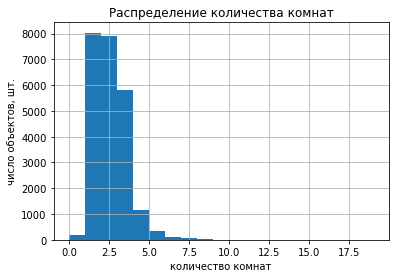

In [45]:
data['rooms'].hist(bins=19)
plt.xlabel('количество комнат')
plt.ylabel('число объектов, шт.')
plt.title('Распределение количества комнат')


<AxesSubplot:title={'center':'Распределение количества комнат'}, xlabel='количество комнат', ylabel='число объектов, шт.'>

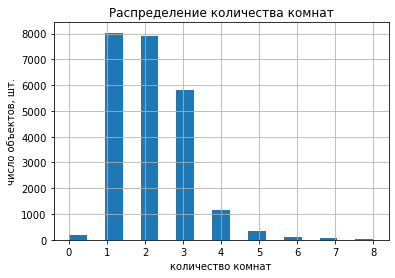

In [46]:
plt.xlabel('количество комнат')
plt.ylabel('число объектов, шт.')
plt.title('Распределение количества комнат')
data['rooms'].hist(bins=17, range = (0, 8))


Вполне ожидаемое распределение.

Давайте посмотрим, что за 197 объектов с размером количества комнат равным 0.

In [47]:
#pd.set_option('display.max_rows', 500)
rooms_stat = data.query('rooms == 0')
display(rooms_stat.head(5))

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type
144,мурино,0,27.00,2450000.00,2,24.00,15.50,NaN,NaN,2.00,2017-03-30T00:00:00,181.00,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,1,NaN,поселок
349,кудрово,0,25.00,2320000.00,1,14.00,17.00,NaN,NaN,0.00,2017-09-27T00:00:00,45.00,NaN,NaN,False,True,NaN,NaN,NaN,NaN,NaN,4,NaN,деревня
440,санкт-петербург,0,27.11,2480000.00,4,17.00,24.75,NaN,NaN,2.00,2018-03-12T00:00:00,64.00,15.02,NaN,True,False,NaN,0.00,2.00,0.98,38.17,8,15.02,не определен
508,парголово,0,34.40,3375000.00,19,26.00,24.30,NaN,NaN,1.00,2017-03-28T00:00:00,430.00,19.29,NaN,False,True,NaN,0.00,1.00,0.59,53.12,0,19.29,поселок
608,шушары,0,25.00,1850000.00,7,10.00,NaN,NaN,NaN,NaN,2019-02-20T00:00:00,29.00,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,2,NaN,поселок


Получается, что это или студии или свободная планировка.

Проверим, только ли они?

In [48]:
rooms_stat = data.query('rooms == 0 & studio == False & open_plan == False') # получилась проверка и здесь наконец-то
display(rooms_stat) 

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type


Оставлю обе проверки для памяти. Та, что выше - сходу не удалась. Пришлось сделать ту, что ниже. Но потом удалось и с query ))

Подтверждение получил вначале только так, через выдачу пустого массива:

In [49]:
rooms_stat = data.loc[(data['rooms'] == 0) & ((data['studio'] == False) & (data['open_plan'] == False))]
display(rooms_stat)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type


Стало быть оставим этот 0 в таблице. Но при необходимости подсчетов будем подставлять 1 или не будем учитывать в подсчетах этот класс объектов. Решим далее.


**2.4. total_area_m2 — площадь квартиры в квадратных метрах (м²)**

23650 non-null  float64


In [50]:
data['total_area_m2'].value_counts(dropna=False)

45.00     419
42.00     383
60.00     346
31.00     346
44.00     343
         ... 
65.15       1
55.64       1
56.16       1
109.10      1
76.75       1
Name: total_area_m2, Length: 2181, dtype: int64

In [51]:
data['total_area_m2'].value_counts(bins=10)

(11.111, 100.8]    21852
(100.8, 189.6]      1533
(189.6, 278.4]       180
(278.4, 367.2]        51
(367.2, 456.0]        18
(456.0, 544.8]        11
(544.8, 633.6]         4
(811.2, 900.0]         1
(633.6, 722.4]         0
(722.4, 811.2]         0
Name: total_area_m2, dtype: int64

In [52]:
data[['total_area_m2']].describe()

,total_area_m2
count,23650.00
mean,60.33
std,35.66
min,12.00
25%,40.00
50%,52.00
75%,69.70
max,900.00


Квартира в 900 кв.м может уже и спортзалом служить ))

Text(0.5, 1.0, 'Распределение объектов по размеру общей площиади')

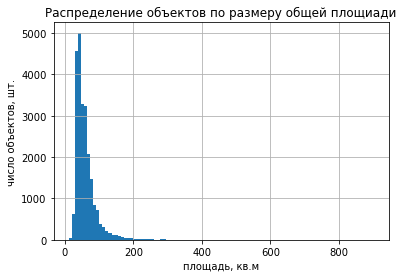

In [53]:
data['total_area_m2'].hist(bins=100)
plt.xlabel('площадь, кв.м')
plt.ylabel('число объектов, шт.')
plt.title('Распределение объектов по размеру общей площиади')

Text(0.5, 1.0, 'Распределение объектов по размеру общей площиади')

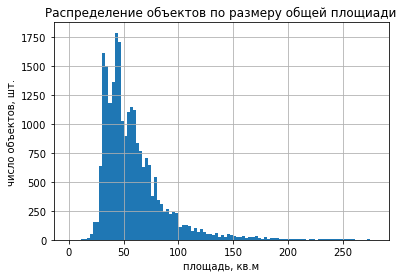

In [54]:
data['total_area_m2'].hist(bins=100, range = (0, 278))
plt.xlabel('площадь, кв.м')
plt.ylabel('число объектов, шт.')
plt.title('Распределение объектов по размеру общей площиади')

Text(0.5, 1.0, 'Распределение объектов по размеру общей площиади')

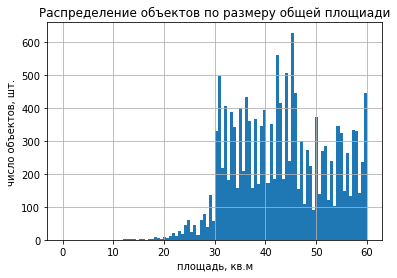

In [55]:
data['total_area_m2'].hist(bins=100, range = (0, 60))
plt.xlabel('площадь, кв.м')
plt.ylabel('число объектов, шт.')
plt.title('Распределение объектов по размеру общей площиади')

**2.5. last_price — цена на момент снятия с публикации**

23650 non-null  float64

In [56]:
data['last_price'].value_counts(dropna=False)

4500000.00     342
3500000.00     289
4300000.00     260
4000000.00     260
4200000.00     258
              ... 
12890000.00      1
29375000.00      1
7545600.00       1
5205000.00       1
11475000.00      1
Name: last_price, Length: 2964, dtype: int64

In [57]:
data['last_price'].value_counts(bins=10)

(-750797.8110000001, 76310971.0]    23583
(76310971.0, 152609752.0]              52
(152609752.0, 228908533.0]              6
(228908533.0, 305207314.0]              5
(381506095.0, 457804876.0]              2
(305207314.0, 381506095.0]              1
(686701219.0, 763000000.0]              1
(457804876.0, 534103657.0]              0
(534103657.0, 610402438.0]              0
(610402438.0, 686701219.0]              0
Name: last_price, dtype: int64

In [58]:
data[['last_price']].describe()

,last_price
count,23650.00
mean,6541126.90
std,10896399.18
min,12190.00
25%,3400000.00
50%,4650000.00
75%,6799000.00
max,763000000.00


Text(0.5, 1.0, 'Распределение последней цены объектов')

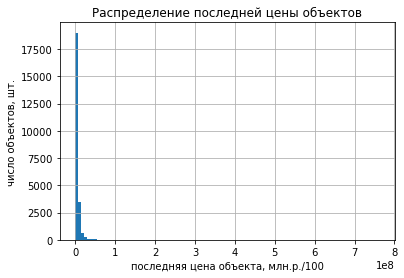

In [59]:
data['last_price'].hist(bins=100)
plt.xlabel('последняя цена объекта, млн.р./100')
plt.ylabel('число объектов, шт.')
plt.title('Распределение последней цены объектов')

Text(0.5, 1.0, 'Распределение последней цены объектов')

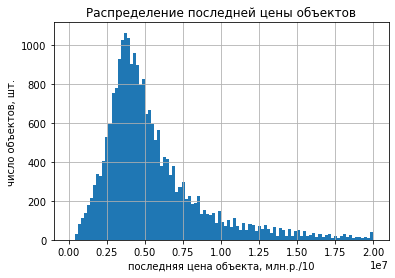

In [60]:
data['last_price'].hist(bins=100, range = (0, 20000000))
plt.xlabel('последняя цена объекта, млн.р./10')
plt.ylabel('число объектов, шт.')
plt.title('Распределение последней цены объектов')

2.5.1. Добавим в таблицу цену 1 кв.м., столбец назовем price_m2

In [61]:
data['price_m2'] = data['last_price'] / data['total_area_m2']
display(data)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2
0,санкт-петербург,3,108.00,13000000.00,8,16.00,51.00,25.00,2.70,NaN,2019-03-07T00:00:00,NaN,16.03,NaN,False,False,0.48,1.00,2.00,0.76,18.86,20,16.03,не определен,120370.37
1,шушары,1,40.40,3350000.00,1,11.00,18.60,11.00,NaN,2.00,2018-12-04T00:00:00,81.00,18.60,NaN,False,False,NaN,0.00,0.00,NaN,12.82,7,18.60,поселок,82920.79
2,санкт-петербург,2,56.00,5196000.00,4,5.00,34.30,8.30,NaN,0.00,2015-08-20T00:00:00,558.00,13.93,NaN,False,False,0.09,1.00,2.00,0.57,21.74,10,13.93,не определен,92785.71
3,санкт-петербург,3,159.00,64900000.00,9,14.00,NaN,NaN,NaN,0.00,2015-07-24T00:00:00,424.00,6.80,NaN,False,False,0.08,2.00,3.00,0.23,28.10,0,6.80,не определен,408176.10
4,санкт-петербург,2,100.00,10000000.00,13,14.00,32.00,41.00,3.03,NaN,2018-06-19T00:00:00,121.00,8.10,NaN,False,False,0.11,2.00,1.00,0.05,31.86,2,8.10,не определен,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,санкт-петербург,3,133.81,9700000.00,3,5.00,73.30,13.83,3.70,NaN,2017-03-21T00:00:00,NaN,4.23,NaN,False,False,0.80,1.00,3.00,0.38,24.66,9,4.23,не определен,72490.85
23695,тосно,3,59.00,3100000.00,4,5.00,38.00,8.50,NaN,NaN,2018-01-15T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,14,NaN,не определен,52542.37
23696,рождествено,2,56.70,2500000.00,1,3.00,29.70,NaN,NaN,NaN,2018-02-11T00:00:00,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,18,NaN,село,44091.71
23697,санкт-петербург,2,76.75,11475000.00,12,17.00,NaN,23.30,3.00,2.00,2017-03-28T00:00:00,602.00,10.36,NaN,False,False,0.17,2.00,3.00,0.20,39.14,13,10.36,не определен,149511.40


In [62]:
data[['price_m2']].describe() # сразу посмотрим на разбросы

,price_m2
count,23650.00
mean,99432.25
std,50337.94
min,111.83
25%,76614.97
50%,95000.00
75%,114274.16
max,1907500.00


Разброс между максимумом и минимумом колоссальный, причем - обе границы явно лежат за пределами реального.

Text(0.5, 1.0, 'распределение цены 1 кв.м.')

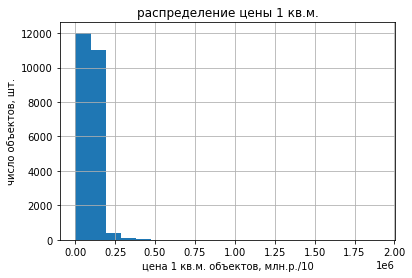

In [63]:
data['price_m2'].hist(bins=20)
plt.xlabel('цена 1 кв.м. объектов, млн.р./10')
plt.ylabel('число объектов, шт.')
plt.title('распределение цены 1 кв.м.')

Text(0.5, 1.0, 'распределение цены 1 кв.м.')

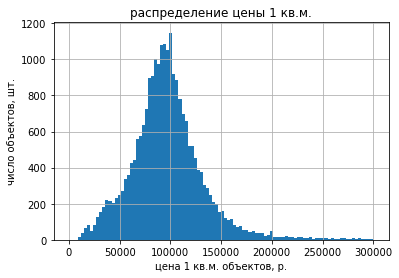

In [64]:
data['price_m2'].hist(bins=100, range = (0, 300000))
plt.xlabel('цена 1 кв.м. объектов, р.')
plt.ylabel('число объектов, шт.')
plt.title('распределение цены 1 кв.м.')

Но в этой зоне распределение красивое и нормальное.  И пока мне не совсем понятно, оно значимо шире границ первого и третьего квартиля, которые в данном случае равны:<BR/>
25% 	76614.97<BR/>
50% 	95000.00<BR/>
75% 	114274.16<BR/>
Для дальнейших расчетов данные надо обрезать, но как - я пока не совсем понимаю. Хотя видны с левой стороны интересные добавочные пики значений<BR/>
Именно показатель цены за кв.м мне кажется самым объективным критерием оценки иных показателей таблицы.<BR/>
Думаю, стоит посмотрет отдельно цену кв.метра в Санк-Петербурге и отдельно  - за его пределами. И думаю, это приведет к тому, что придется далее рассматривать эти группы раздельно.

In [65]:
data_spb = data.copy()

data_spb = data_spb.query('locality_name == "санкт-петербург"') # сделаем пока отдельный массив данных
display(data_spb)


,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2
0,санкт-петербург,3,108.00,13000000.00,8,16.00,51.00,25.00,2.70,NaN,2019-03-07T00:00:00,NaN,16.03,NaN,False,False,0.48,1.00,2.00,0.76,18.86,20,16.03,не определен,120370.37
2,санкт-петербург,2,56.00,5196000.00,4,5.00,34.30,8.30,NaN,0.00,2015-08-20T00:00:00,558.00,13.93,NaN,False,False,0.09,1.00,2.00,0.57,21.74,10,13.93,не определен,92785.71
3,санкт-петербург,3,159.00,64900000.00,9,14.00,NaN,NaN,NaN,0.00,2015-07-24T00:00:00,424.00,6.80,NaN,False,False,0.08,2.00,3.00,0.23,28.10,0,6.80,не определен,408176.10
4,санкт-петербург,2,100.00,10000000.00,13,14.00,32.00,41.00,3.03,NaN,2018-06-19T00:00:00,121.00,8.10,NaN,False,False,0.11,2.00,1.00,0.05,31.86,2,8.10,не определен,100000.00
7,санкт-петербург,2,71.60,7915000.00,22,24.00,NaN,18.90,NaN,2.00,2019-04-18T00:00:00,NaN,11.63,NaN,False,False,NaN,0.00,0.00,NaN,23.98,5,11.63,не определен,110544.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,санкт-петербург,1,35.30,3550000.00,4,15.00,16.30,9.10,2.86,2.00,2018-02-28T00:00:00,29.00,16.08,NaN,False,False,0.35,1.00,2.00,0.65,17.28,13,16.08,не определен,100566.57
23690,санкт-петербург,2,52.00,5500000.00,2,5.00,31.00,6.00,NaN,NaN,2018-07-19T00:00:00,15.00,6.26,NaN,False,False,0.30,1.00,0.00,NaN,20.15,3,6.26,не определен,105769.23
23691,санкт-петербург,2,72.90,9470000.00,7,25.00,40.30,10.60,2.75,1.00,2016-10-13T00:00:00,519.00,4.49,NaN,False,False,NaN,0.00,1.00,0.81,19.42,11,4.49,не определен,129903.98
23694,санкт-петербург,3,133.81,9700000.00,3,5.00,73.30,13.83,3.70,NaN,2017-03-21T00:00:00,NaN,4.23,NaN,False,False,0.80,1.00,3.00,0.38,24.66,9,4.23,не определен,72490.85


In [66]:
data_spb[['price_m2']].describe() # сразу посмотрим на разбросы

,price_m2
count,15721.00
mean,114849.01
std,52584.52
min,111.83
25%,90909.09
50%,104761.90
75%,124438.90
max,1907500.00


Было:<br/>
25% 76614.97<br/>
50% 95000.00<br/>
75% 114274.16<br/>

Как и ожидалось цифры квартилей увеличились

Text(0.5, 1.0, 'spb - распределение цены 1 кв.м.')

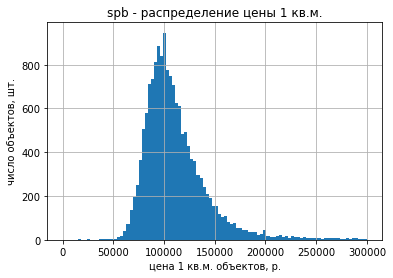

In [67]:
data_spb['price_m2'].hist(bins=100, range = (0, 300000))
plt.xlabel('цена 1 кв.м. объектов, р.')
plt.ylabel('число объектов, шт.')
plt.title('spb - распределение цены 1 кв.м.')

In [68]:
data_spb[['price_m2']].describe([0.05, .125, .25, .5, .75, .875, .95]) #http://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.DataFrame.describe.html

,price_m2
count,15721.00
mean,114849.01
std,52584.52
min,111.83
5%,75134.17
12.5%,82826.09
25%,90909.09
50%,104761.90
75%,124438.90
87.5%,143835.62


Получили достаточно гладкое и красивое распределение.

Не делаю только что изученные графические распределения с усами и "магическим ящиком" - гистограммы и цифры для меня более показательны.

In [69]:
data_nospb = data.copy()

data_nospb = data_nospb.query('locality_name != "санкт-петербург"') # 
display(data_nospb)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2
1,шушары,1,40.40,3350000.00,1,11.00,18.60,11.00,NaN,2.00,2018-12-04T00:00:00,81.00,18.60,NaN,False,False,NaN,0.00,0.00,NaN,12.82,7,18.60,поселок,82920.79
5,янино-1,1,30.40,2890000.00,5,12.00,14.40,9.10,NaN,NaN,2018-09-10T00:00:00,55.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,10,NaN,городской поселок,95065.79
6,парголово,1,37.30,3700000.00,6,26.00,10.60,14.40,NaN,1.00,2017-11-02T00:00:00,155.00,19.14,NaN,False,False,NaN,0.00,0.00,NaN,53.00,6,19.14,поселок,99195.71
8,мурино,1,33.16,2900000.00,26,27.00,15.43,8.81,NaN,NaN,2018-05-23T00:00:00,189.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,20,NaN,поселок,87454.76
11,ломоносов,2,44.00,3300000.00,4,5.00,31.00,6.00,NaN,1.00,2018-08-27T00:00:00,7.00,51.68,False,False,False,NaN,0.00,0.00,NaN,48.25,9,51.68,не определен,75000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,тихвин,1,30.00,1350000.00,4,5.00,17.50,6.00,NaN,NaN,2017-07-07T00:00:00,413.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,2,NaN,не определен,45000.00
23693,петергоф,3,62.40,4600000.00,8,9.00,40.00,8.00,2.60,0.00,2016-08-05T00:00:00,239.00,34.10,NaN,False,False,0.35,1.00,1.00,0.68,45.60,9,34.10,не определен,73717.95
23695,тосно,3,59.00,3100000.00,4,5.00,38.00,8.50,NaN,NaN,2018-01-15T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,14,NaN,не определен,52542.37
23696,рождествено,2,56.70,2500000.00,1,3.00,29.70,NaN,NaN,NaN,2018-02-11T00:00:00,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,18,NaN,село,44091.71


In [70]:
data_nospb[['price_m2']].describe() # сразу посмотрим на разбросы

,price_m2
count,7929.00
mean,68865.10
std,25883.81
min,7962.96
25%,51886.79
50%,68728.52
75%,85043.99
max,640422.35


А здесь цифры квартилей уменьшились<br/>
Было:<br/>
25% 76614.97<br/>
50% 95000.00<br/>
75% 114274.16<br/>

Text(0.5, 1.0, 'вне spb - распределение цены 1 кв.м.')

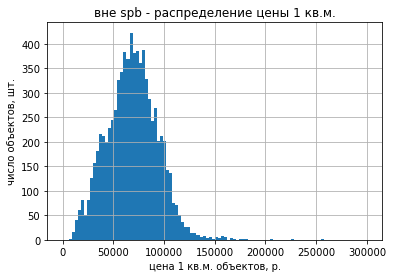

In [71]:
data_nospb['price_m2'].hist(bins=100, range = (0, 300000))
plt.xlabel('цена 1 кв.м. объектов, р.')
plt.ylabel('число объектов, шт.')
plt.title('вне spb - распределение цены 1 кв.м.')

И качественно изменился характер гистограмм.

In [72]:
data_nospb[['price_m2']].describe([0.05, .125, .25, .5, .75, .875, .95]) #http://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.DataFrame.describe.html

,price_m2
count,7929.00
mean,68865.10
std,25883.81
min,7962.96
5%,28448.28
12.5%,38750.00
25%,51886.79
50%,68728.52
75%,85043.99
87.5%,97058.82


Суть в том, что не хотелось бы обрезать данные стандартно по квартилям, я бы это сделал по 5% и 95% и именно по показателю цены квадратного метра. Посмотрим далее, обработав остальные столбцы.

**2.6.  floor — этаж и floors_total — всего этажей в доме**<br/>
floor          23650 non-null  int64<br/>
floors_total   23565 non-null  float64

In [73]:
data['floor'].value_counts(dropna=False)

2     3353
3     3065
1     2912
4     2802
5     2616
6     1302
7     1215
8     1083
9     1050
10     687
12     525
11     523
13     379
15     343
14     335
16     315
17     227
18     178
19     147
21     123
22     112
20     110
23      99
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

In [74]:
data['floors_total'].value_counts(dropna=False)

5.00     5775
9.00     3758
16.00    1375
12.00    1361
4.00     1193
10.00    1174
25.00    1075
6.00      910
17.00     833
3.00      667
7.00      589
14.00     553
18.00     505
24.00     462
8.00      388
2.00      381
15.00     365
23.00     349
19.00     339
22.00     286
20.00     271
13.00     229
11.00     202
27.00     164
21.00     158
26.00     124
NaN        85
1.00       25
35.00      24
28.00      21
36.00       3
34.00       1
60.00       1
29.00       1
33.00       1
52.00       1
37.00       1
Name: floors_total, dtype: int64

Надо бы посмотреть, что за строки с пропущенными значениями. Также сделать оценку корректности проставления floors, этаж не должен быть выше этажа дома. И посмотрим, что за строки с этажами выше 27-го?

In [75]:
floors_nan = data[data['floors_total'].isna()] # смотрим сразу на данные floor 
display(floors_nan)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2
186,санкт-петербург,2,65.20,11640000.00,4,NaN,30.80,12.00,NaN,NaN,2018-10-02T00:00:00,49.00,12.37,NaN,False,False,0.12,1.00,0.00,NaN,39.20,12,12.37,не определен,178527.61
237,санкт-петербург,1,28.10,2438033.00,1,NaN,20.75,NaN,NaN,0.00,2016-11-23T00:00:00,251.00,17.37,NaN,False,False,NaN,0.00,1.00,0.37,22.04,4,17.37,не определен,86762.74
457,санкт-петербург,2,70.80,9788348.00,12,NaN,38.40,10.63,NaN,0.00,2015-08-01T00:00:00,727.00,8.32,NaN,False,False,0.31,2.00,2.00,0.71,37.36,4,8.32,не определен,138253.50
671,санкт-петербург,3,93.60,6051191.00,8,NaN,47.10,16.80,NaN,0.00,2017-04-06T00:00:00,123.00,17.37,NaN,False,False,NaN,0.00,1.00,0.37,22.04,4,17.37,не определен,64649.48
1757,санкт-петербург,1,39.00,3600000.00,9,NaN,NaN,NaN,NaN,0.00,2017-04-22T00:00:00,77.00,11.62,NaN,False,False,0.83,1.00,1.00,0.65,22.73,5,11.62,не определен,92307.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,санкт-петербург,2,63.50,8500000.00,3,NaN,NaN,NaN,2.80,NaN,2017-05-24T00:00:00,512.00,15.36,NaN,False,False,NaN,0.00,1.00,0.85,51.34,5,15.36,не определен,133858.27
22656,санкт-петербург,2,64.50,4574160.00,20,NaN,31.70,14.40,NaN,0.00,2017-04-02T00:00:00,127.00,17.37,NaN,False,False,NaN,0.00,1.00,0.37,22.04,4,17.37,не определен,70917.21
22808,санкт-петербург,3,110.40,14569263.00,6,NaN,45.38,23.42,NaN,0.00,2016-11-20T00:00:00,260.00,4.53,NaN,False,False,NaN,0.00,0.00,NaN,19.09,0,4.53,не определен,131967.96
23590,санкт-петербург,3,123.30,21187872.00,18,NaN,50.40,23.60,NaN,0.00,2017-04-25T00:00:00,104.00,4.53,NaN,False,False,NaN,0.00,0.00,NaN,19.09,0,4.53,не определен,171840.00


Скорее всего, эти данные не были указаны клиентом. И большинство этих строк и без данных столбца ceiling_height_m <br/>
Скорее все эти все эти строки придется удалить - они далее участвуют в расчетах.

In [76]:
data.dropna(subset = ['floors_total'], inplace = True) # inplace = False смотрим только копию данных
data['floors_total'].isna().sum() # и снова проверим - посчитаем количество NaN 

0

Поменяем тип данных в 'floors_total', чтобы они были одного типа с 'floor'

In [77]:
data['floors_total'] = data['floors_total'].astype('int') # меняем тип данных
data['floors_total'].value_counts(dropna=False)

5     5775
9     3758
16    1375
12    1361
4     1193
10    1174
25    1075
6      910
17     833
3      667
7      589
14     553
18     505
24     462
8      388
2      381
15     365
23     349
19     339
22     286
20     271
13     229
11     202
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
29       1
33       1
52       1
37       1
Name: floors_total, dtype: int64

In [78]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   locality_name               23565 non-null  object 
 1   rooms                       23565 non-null  int64  
 2   total_area_m2               23565 non-null  float64
 3   last_price                  23565 non-null  float64
 4   floor                       23565 non-null  int64  
 5   floors_total                23565 non-null  int32  
 6   living_area_m2              21700 non-null  float64
 7   kitchen_area_m2             21343 non-null  float64
 8   ceiling_height_m            14481 non-null  float64
 9   balcony                     12090 non-null  float64
 10  first_day_exposition        23565 non-null  object 
 11  days_exposition             20394 non-null  float64
 12  citycenters_nearest_km      18064 non-null  float64
 13  is_apartment                276

In [79]:
#uint8
data['floors_total'] = data['floors_total'].astype('uint8') # меняем тип данных
data['floor'] = data['floor'].astype('uint8')
#data['floors_total'].value_counts(dropna=False)
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   locality_name               23565 non-null  object 
 1   rooms                       23565 non-null  int64  
 2   total_area_m2               23565 non-null  float64
 3   last_price                  23565 non-null  float64
 4   floor                       23565 non-null  uint8  
 5   floors_total                23565 non-null  uint8  
 6   living_area_m2              21700 non-null  float64
 7   kitchen_area_m2             21343 non-null  float64
 8   ceiling_height_m            14481 non-null  float64
 9   balcony                     12090 non-null  float64
 10  first_day_exposition        23565 non-null  object 
 11  days_exposition             20394 non-null  float64
 12  citycenters_nearest_km      18064 non-null  float64
 13  is_apartment                276

In [80]:
data_floor_stran = data.loc[data['floor'] > data['floors_total']] # проверим на условие, что значение этажа больше значения этажности дома.
display(data_floor_stran)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2


Нет таких строк, что радует.

2.6.1. Добавим дополнительный столбец с признаком к столбцу 'floor' - первый этаж или последний или другой

In [81]:
def floor_type(row):                                      
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    return  'не определен'
data['floor_type'] = data.apply(floor_type, axis=1) # добавлем столбец
display(data.sample(5))

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type
5126,санкт-петербург,4,116.00,7700000.00,19,25,75.70,11.20,2.78,2.00,2017-03-01T00:00:00,642.00,15.14,NaN,False,False,NaN,0.00,0.00,NaN,16.35,6,15.14,не определен,66379.31,другой
21173,санкт-петербург,1,41.00,3550000.00,10,12,20.00,11.00,NaN,2.00,2016-09-30T00:00:00,176.00,13.96,False,False,False,NaN,0.00,0.00,NaN,32.86,3,13.96,не определен,86585.37,другой
22647,новый учхоз,1,30.00,1700000.00,3,5,16.00,6.00,2.60,NaN,2018-04-03T00:00:00,127.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,11,NaN,поселок,56666.67,другой
6606,санкт-петербург,4,77.10,6500000.00,6,9,54.80,10.00,NaN,NaN,2018-08-22T00:00:00,21.00,11.68,NaN,False,False,0.30,2.00,1.00,0.95,27.85,9,11.68,не определен,84306.10,другой
19188,санкт-петербург,2,58.00,7700000.00,7,10,30.00,8.50,2.50,1.00,2019-04-26T00:00:00,NaN,11.52,NaN,False,False,0.80,1.00,1.00,0.14,12.58,12,11.52,не определен,132758.62,другой


In [82]:
data_one = data.query('floor_type == "первый"') # проверка на первый
display(data_one)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type
1,шушары,1,40.40,3350000.00,1,11,18.60,11.00,NaN,2.00,2018-12-04T00:00:00,81.00,18.60,NaN,False,False,NaN,0.00,0.00,NaN,12.82,7,18.60,поселок,82920.79,первый
14,пушкин,1,36.00,4400000.00,1,6,17.00,8.00,NaN,0.00,2016-06-23T00:00:00,203.00,30.76,NaN,False,False,NaN,0.00,1.00,0.10,20.78,1,30.76,не определен,122222.22,первый
16,санкт-петербург,3,82.00,6700000.00,1,5,55.60,9.00,3.05,NaN,2017-11-23T00:00:00,397.00,10.70,NaN,False,False,0.42,3.00,0.00,NaN,22.11,11,10.70,не определен,81707.32,первый
24,санкт-петербург,2,97.20,6500000.00,1,3,46.50,19.60,NaN,0.00,2015-10-31T00:00:00,265.00,2.34,NaN,False,False,0.41,3.00,3.00,0.12,20.05,8,2.34,не определен,66872.43,первый
28,пушкин,1,44.00,4170000.00,1,6,20.80,11.70,2.90,1.00,2017-12-13T00:00:00,74.00,30.71,NaN,False,False,NaN,0.00,1.00,0.12,18.56,8,30.71,не определен,94772.73,первый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,санкт-петербург,1,47.00,4250000.00,1,6,18.20,14.60,NaN,0.00,2016-05-20T00:00:00,131.00,4.95,False,False,False,0.62,2.00,1.00,0.52,20.50,11,4.95,не определен,90425.53,первый
23673,санкт-петербург,1,23.00,3100000.00,1,9,12.60,5.00,2.80,2.00,2018-03-19T00:00:00,41.00,11.88,NaN,False,False,0.26,1.00,1.00,0.44,11.81,9,11.88,не определен,134782.61,первый
23680,санкт-петербург,3,59.00,5000000.00,1,5,52.00,7.00,2.50,NaN,2019-04-04T00:00:00,NaN,11.88,NaN,False,False,NaN,0.00,0.00,NaN,26.84,14,11.88,не определен,84745.76,первый
23696,рождествено,2,56.70,2500000.00,1,3,29.70,NaN,NaN,NaN,2018-02-11T00:00:00,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,18,NaN,село,44091.71,первый


In [83]:
data_last = data.query('floor_type == "последний"') # проверка на последний
display(data_last)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type
12,сертолово,2,54.00,3890000.00,5,5,30.00,9.00,NaN,0.00,2016-06-30T00:00:00,90.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,10,NaN,не определен,72037.04,последний
13,петергоф,2,42.80,3550000.00,5,5,27.00,5.20,2.56,1.00,2017-07-01T00:00:00,366.00,33.06,NaN,False,False,0.29,1.00,3.00,0.30,37.87,20,33.06,не определен,82943.93,последний
23,санкт-петербург,1,32.00,2950000.00,9,9,17.70,6.10,2.60,NaN,2016-10-29T00:00:00,615.00,14.21,NaN,False,False,0.52,2.00,1.00,0.19,15.41,11,14.21,не определен,92187.50,последний
36,санкт-петербург,2,45.00,3790000.00,9,9,27.00,6.30,NaN,2.00,2017-01-25T00:00:00,139.00,16.46,False,False,False,0.46,1.00,0.00,NaN,49.57,13,16.46,не определен,84222.22,последний
43,санкт-петербург,2,48.00,9330000.00,4,4,28.00,7.50,3.00,NaN,2017-01-10T00:00:00,763.00,10.82,NaN,False,False,NaN,0.00,1.00,0.49,15.02,13,10.82,не определен,194375.00,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23641,колпино,1,30.00,3100000.00,5,5,17.00,5.00,2.50,NaN,2018-03-28T00:00:00,10.00,29.84,NaN,False,False,NaN,0.00,0.00,NaN,24.06,3,29.84,не определен,103333.33,последний
23644,санкт-петербург,2,62.50,4990000.00,4,4,32.30,12.10,2.70,NaN,2018-04-26T00:00:00,166.00,4.42,NaN,False,False,0.56,1.00,1.00,0.17,20.14,7,4.42,не определен,79840.00,последний
23648,санкт-петербург,3,78.00,10100000.00,5,5,48.60,8.20,3.27,NaN,2017-05-12T00:00:00,621.00,1.11,NaN,False,False,0.62,1.00,2.00,0.12,20.93,14,1.11,не определен,129487.18,последний
23660,красное,2,53.60,2950000.00,3,3,32.00,5.80,2.75,1.00,2018-02-01T00:00:00,35.00,41.72,False,False,False,NaN,0.00,0.00,NaN,38.29,1,41.72,село,55037.31,последний


In [84]:
data_last_one = data.loc[(data['floor_type'] == "последний") & ((data['floor'] == 1))]
#data_last_one = data.query('floor_type == "последний" & floor == 1') # надо поизучать синтакис query
display(data_last_one) # проверил, не попал ли 1 этаж в последнии на одноэтажном доме ))

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type


In [85]:
data_last_one_one = data.loc[(data['floor_type'] == "первый") & ((data['floors_total'] == 1))]

display(data_last_one_one) # проверил, попал ли 1 этаж в последнии на одноэтажном доме ))

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type
3076,волосово,3,80.00,2000000.00,1,1,48.50,10.00,NaN,NaN,2018-01-03T00:00:00,44.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,20,NaN,не определен,25000.00,первый
4379,рощино,2,58.50,5300000.00,1,1,31.60,9.40,NaN,NaN,2017-11-15T00:00:00,226.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,5,NaN,поселок городского типа,90598.29,первый
5300,вещево,3,60.00,2990000.00,1,1,50.00,10.00,NaN,NaN,2018-11-15T00:00:00,40.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,5,NaN,поселок станции,49833.33,первый
5698,будогощь,2,42.00,450000.00,1,1,23.00,5.80,NaN,NaN,2017-07-31T00:00:00,233.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,7,NaN,городской поселок,10714.29,первый
5787,санкт-петербург,3,88.00,9000000.00,1,1,NaN,NaN,NaN,NaN,2018-08-06T00:00:00,60.00,20.80,NaN,False,False,NaN,0.00,1.00,0.79,44.87,16,20.80,не определен,102272.73,первый
7962,луга,3,46.20,550000.00,1,1,NaN,NaN,NaN,NaN,2018-04-20T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,4,NaN,не определен,11904.76,первый
8335,луга,3,80.00,2700000.00,1,1,45.00,15.00,3.00,NaN,2018-07-07T00:00:00,51.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,10,NaN,не определен,33750.00,первый
8388,сестрорецк,3,48.20,3550000.00,1,1,33.90,9.10,2.65,NaN,2019-03-30T00:00:00,NaN,31.14,NaN,False,False,NaN,0.00,0.00,NaN,50.05,20,31.14,не определен,73651.45,первый
9517,гаврилово,2,39.40,1200000.00,1,1,NaN,NaN,NaN,NaN,2018-01-08T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,4,NaN,поселок,30456.85,первый
9752,сижно,2,62.00,850000.00,1,1,31.00,11.00,NaN,NaN,2018-11-10T00:00:00,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,16,NaN,деревня,13709.68,первый


In [86]:
data_other = data.query('floor_type == "другой"') # проверка на другой
display(data_other)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type
0,санкт-петербург,3,108.00,13000000.00,8,16,51.00,25.00,2.70,NaN,2019-03-07T00:00:00,NaN,16.03,NaN,False,False,0.48,1.00,2.00,0.76,18.86,20,16.03,не определен,120370.37,другой
2,санкт-петербург,2,56.00,5196000.00,4,5,34.30,8.30,NaN,0.00,2015-08-20T00:00:00,558.00,13.93,NaN,False,False,0.09,1.00,2.00,0.57,21.74,10,13.93,не определен,92785.71,другой
3,санкт-петербург,3,159.00,64900000.00,9,14,NaN,NaN,NaN,0.00,2015-07-24T00:00:00,424.00,6.80,NaN,False,False,0.08,2.00,3.00,0.23,28.10,0,6.80,не определен,408176.10,другой
4,санкт-петербург,2,100.00,10000000.00,13,14,32.00,41.00,3.03,NaN,2018-06-19T00:00:00,121.00,8.10,NaN,False,False,0.11,2.00,1.00,0.05,31.86,2,8.10,не определен,100000.00,другой
5,янино-1,1,30.40,2890000.00,5,12,14.40,9.10,NaN,NaN,2018-09-10T00:00:00,55.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,10,NaN,городской поселок,95065.79,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,тихвин,1,30.00,1350000.00,4,5,17.50,6.00,NaN,NaN,2017-07-07T00:00:00,413.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,2,NaN,не определен,45000.00,другой
23693,петергоф,3,62.40,4600000.00,8,9,40.00,8.00,2.60,0.00,2016-08-05T00:00:00,239.00,34.10,NaN,False,False,0.35,1.00,1.00,0.68,45.60,9,34.10,не определен,73717.95,другой
23694,санкт-петербург,3,133.81,9700000.00,3,5,73.30,13.83,3.70,NaN,2017-03-21T00:00:00,NaN,4.23,NaN,False,False,0.80,1.00,3.00,0.38,24.66,9,4.23,не определен,72490.85,другой
23695,тосно,3,59.00,3100000.00,4,5,38.00,8.50,NaN,NaN,2018-01-15T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,14,NaN,не определен,52542.37,другой


In [87]:
data_nodef = data.query('floor_type == "не определен"') # проверка на не определен
display(data_nodef)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type


In [88]:
data_floor_high = data.query('floors_total > 27') # проверка высоких домов
display(data_floor_high)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type
324,санкт-петербург,2,62.00,6090000.00,22,28,30.00,10.00,NaN,1.00,2015-09-06T00:00:00,323.00,21.68,NaN,False,False,NaN,0.00,1.00,0.55,19.97,0,21.68,не определен,98225.81,другой
397,санкт-петербург,2,54.00,5990000.00,28,36,21.40,18.70,NaN,1.00,2018-03-22T00:00:00,11.00,20.44,NaN,False,False,NaN,0.00,3.00,0.08,18.73,15,20.44,не определен,110925.93,другой
806,санкт-петербург,2,68.20,7520000.00,5,28,35.70,10.70,NaN,NaN,2017-12-13T00:00:00,NaN,16.68,NaN,False,False,NaN,0.00,0.00,NaN,48.85,3,16.68,не определен,110263.93,другой
871,санкт-петербург,2,75.00,7777777.00,23,35,40.50,11.70,NaN,NaN,2017-11-16T00:00:00,169.00,20.44,NaN,False,False,NaN,0.00,3.00,0.08,18.73,14,20.44,не определен,103703.69,другой
1060,санкт-петербург,2,50.00,5200000.00,15,35,39.00,20.50,NaN,2.00,2015-11-06T00:00:00,281.00,20.44,False,False,False,NaN,0.00,3.00,0.08,18.73,10,20.44,не определен,104000.00,другой
1697,санкт-петербург,1,28.00,3550000.00,23,34,18.00,NaN,2.65,NaN,2018-02-08T00:00:00,410.00,20.44,NaN,False,False,NaN,0.00,3.00,0.08,18.73,11,20.44,не определен,126785.71,другой
1917,санкт-петербург,2,74.00,10150000.00,30,35,34.40,13.00,2.80,NaN,2017-11-17T00:00:00,NaN,20.44,NaN,False,False,NaN,0.00,3.00,0.08,18.73,13,20.44,не определен,137162.16,другой
2253,кронштадт,2,45.50,3800000.00,4,60,27.40,7.40,2.88,NaN,2018-06-28T00:00:00,166.00,49.49,NaN,False,False,0.34,2.00,3.00,0.61,67.76,12,49.49,не определен,83516.48,другой
2966,санкт-петербург,1,37.00,4300000.00,15,35,14.00,10.40,NaN,0.00,2017-08-08T00:00:00,50.00,20.44,NaN,False,False,NaN,0.00,3.00,0.08,18.73,9,20.44,не определен,116216.22,другой
3797,парголово,1,43.20,4100000.00,18,29,14.35,14.40,2.60,2.00,2018-09-24T00:00:00,45.00,19.94,NaN,False,False,NaN,0.00,0.00,NaN,53.73,10,19.94,поселок,94907.41,другой


Сложно сделать выводы по этим высоким домам без знания соответствующих объектов недвижимости, оставим пока все. Отметим, что среди них нет ни одного с признаком последнего этажа.

**2.7. living_area_m2 — жилая площадь в квадратных метрах(м²)**<br/>
21752 non-null  float64

In [89]:
data['living_area_m2'].value_counts(dropna=False)

NaN       1865
18.00      882
17.00      673
30.00      598
16.00      483
          ... 
82.10        1
68.48        1
31.12        1
160.10       1
42.55        1
Name: living_area_m2, Length: 1770, dtype: int64

In [90]:
data[['living_area_m2']].describe()

,living_area_m2
count,21700.00
mean,34.45
std,22.05
min,2.00
25%,18.60
50%,30.00
75%,42.30
max,409.70


Text(0.5, 1.0, 'Распределение жилой площади объектов')

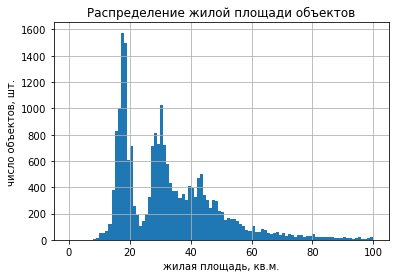

In [91]:
data['living_area_m2'].hist(bins=100, range = (0, 100))
plt.xlabel('жилая площадь, кв.м.')
plt.ylabel('число объектов, шт.')
plt.title('Распределение жилой площади объектов')

Надо посмотреть для регионов, как делали выше.

Text(0.5, 1.0, 'spb - распределение жилой площади объектов')

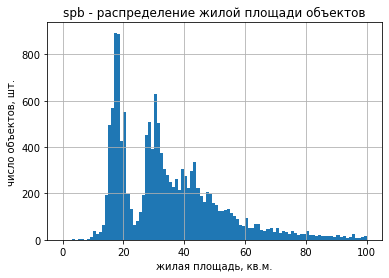

In [92]:
data_spb['living_area_m2'].hist(bins=100, range = (0, 100))
plt.xlabel('жилая площадь, кв.м.')
plt.ylabel('число объектов, шт.')
plt.title('spb - распределение жилой площади объектов')

Text(0.5, 1.0, 'вне spb - распределение жилой площади объектов')

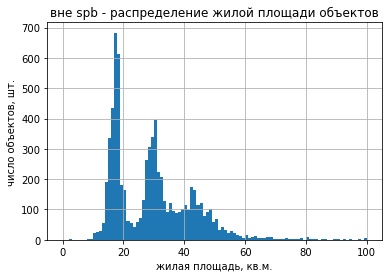

In [93]:
data_nospb['living_area_m2'].hist(bins=100, range = (0, 100))
plt.xlabel('жилая площадь, кв.м.')
plt.ylabel('число объектов, шт.')
plt.title('вне spb - распределение жилой площади объектов')

Не совсем понятная гистограмма, надо бы понять ее природу, она в обоих регионах. <br/>
Основная версия - эти два пика объясняются разными сериями постройки домов. Если бы был год строительства дома, можно было бы попытаться оценить правоту данной идеи.

И посмотрим, что за строки с пропущенными данными

In [94]:
living_area_m2_nan = data[data['living_area_m2'].isna()] # смотрим сразу на данные living_area_m2
display(living_area_m2_nan)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type
3,санкт-петербург,3,159.00,64900000.00,9,14,NaN,NaN,NaN,0.00,2015-07-24T00:00:00,424.00,6.80,NaN,False,False,0.08,2.00,3.00,0.23,28.10,0,6.80,не определен,408176.10,другой
7,санкт-петербург,2,71.60,7915000.00,22,24,NaN,18.90,NaN,2.00,2019-04-18T00:00:00,NaN,11.63,NaN,False,False,NaN,0.00,0.00,NaN,23.98,5,11.63,не определен,110544.69,другой
30,коммунар,1,32.80,2200000.00,2,9,NaN,NaN,NaN,NaN,2018-02-19T00:00:00,63.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,12,NaN,не определен,67073.17,другой
37,красный бор,2,45.80,1990000.00,1,5,NaN,NaN,2.50,NaN,2017-10-28T00:00:00,196.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,10,NaN,поселок городского типа,43449.78,первый
44,санкт-петербург,1,40.00,5350000.00,3,22,NaN,NaN,NaN,1.00,2018-11-18T00:00:00,NaN,11.60,NaN,False,False,0.62,1.00,1.00,1.15,30.47,13,11.60,не определен,133750.00,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,колпино,3,80.30,5950000.00,5,12,NaN,NaN,2.70,NaN,2018-07-03T00:00:00,60.00,33.72,NaN,False,False,NaN,0.00,2.00,0.56,27.93,14,33.72,не определен,74097.14,другой
23663,санкт-петербург,4,88.00,6400000.00,1,10,NaN,NaN,2.55,NaN,2018-01-12T00:00:00,59.00,13.94,NaN,False,False,NaN,0.00,2.00,0.84,33.64,12,13.94,не определен,72727.27,первый
23670,синявино,1,45.60,2450000.00,2,9,NaN,NaN,2.80,NaN,2018-02-08T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,9,NaN,поселок городского типа,53728.07,другой
23679,сосновый бор,1,35.00,2500000.00,4,9,NaN,NaN,NaN,NaN,2017-12-08T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,0,NaN,не определен,71428.57,другой


Сходу особо ничего не видно, похоже, что клиент просто не ввел данных. Может их просто не знать, например. Процент данных небольшой, можно и удалить, посмотрим - как они далее участвуют в расчетах. Но не будем торопиться. Интересно посмотреть корреляцию между общей и жилой площадью.

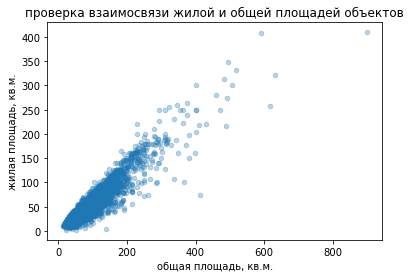

In [95]:
data.plot(x='total_area_m2', y='living_area_m2', kind='scatter', alpha=0.3)
plt.xlabel('общая площадь, кв.м.')
plt.ylabel('жилая площадь, кв.м.')
plt.title('проверка взаимосвязи жилой и общей площадей объектов');

In [96]:
print(data['total_area_m2'].corr(data['living_area_m2'])) # посчитаем коэффициент Пирсона

0.9397711143610333


Коэффициент Пирсона говорит о довольно высокой корреляции между двумя этими величинами. Можно тогда попробовать сделать новый столбец, поделив одно на другое и посмотреть разброс этих величин. Это покажет и ошибки в данных и можно посчитать недостающие значения living_area_m2 через total_area_m2

In [97]:
data['area_liv_corr'] = data['living_area_m2'] / data['total_area_m2']

In [98]:
data[['area_liv_corr']].describe()

,area_liv_corr
count,21700.00
mean,0.56
std,0.11
min,0.02
25%,0.50
50%,0.57
75%,0.64
max,1.00


Text(0.5, 1.0, 'соотношение жилой к общей площади объектов')

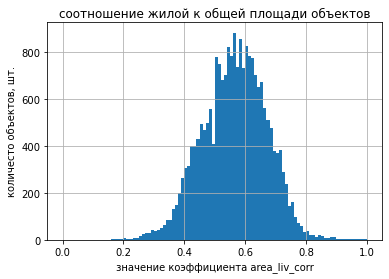

In [99]:
data['area_liv_corr'].hist(bins=100, range = (0, 1))
plt.xlabel('значение коэффициента area_liv_corr')
plt.ylabel('количесто объектов, шт.')
plt.title('соотношение жилой к общей площади объектов')

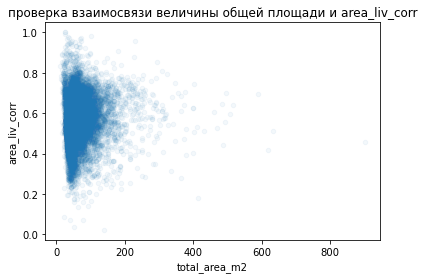

In [100]:
data.plot(x='total_area_m2', y='area_liv_corr', kind='scatter', alpha=0.05) # а как коээфициент зависит от площади
plt.title('проверка взаимосвязи величины общей площади и area_liv_corr');

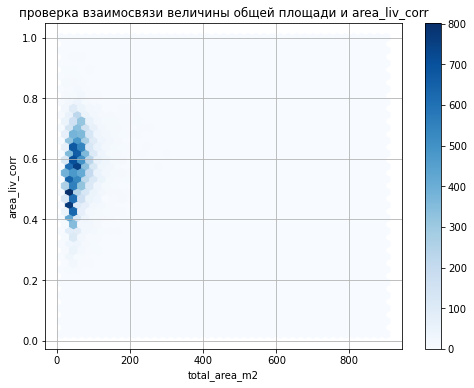

In [101]:
data.plot(x='total_area_m2',
          y='area_liv_corr', kind='hexbin', gridsize=40, figsize=(8, 6), cmap="Blues", sharex=False, grid=True) 
plt.title('проверка взаимосвязи величины общей площади и area_liv_corr');

Чем меньше площадь, тем точность коэффициента падает - но такая замена, на мой взгляд, вполне возможна.<br/>
Надо разбираться с природой двух пиков, мне они пока непонятны.

In [102]:
data_area_corr_high = data.query('area_liv_corr > 0.8') # проверка высокого коффициента area_liv_corr
display(data_area_corr_high)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type,area_liv_corr
184,санкт-петербург,1,30.20,2600000.00,5,9,26.10,6.20,2.65,NaN,2018-02-14T00:00:00,12.00,15.03,NaN,False,False,NaN,0.00,1.00,0.82,13.95,7,15.03,не определен,86092.72,другой,0.86
424,санкт-петербург,3,98.00,11500000.00,3,3,88.00,NaN,2.65,1.00,2016-05-10T00:00:00,90.00,13.27,False,False,False,NaN,0.00,0.00,NaN,39.36,14,13.27,не определен,117346.94,последний,0.90
440,санкт-петербург,0,27.11,2480000.00,4,17,24.75,NaN,NaN,2.00,2018-03-12T00:00:00,64.00,15.02,NaN,True,False,NaN,0.00,2.00,0.98,38.17,8,15.02,не определен,91479.16,другой,0.91
545,санкт-петербург,1,23.80,4700000.00,9,18,20.00,5.00,NaN,NaN,2018-12-28T00:00:00,108.00,11.85,NaN,False,False,NaN,0.00,0.00,NaN,9.73,9,11.85,не определен,197478.99,другой,0.84
551,мурино,1,31.59,3100000.00,2,19,30.55,9.28,2.70,2.00,2018-03-08T00:00:00,70.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,8,NaN,поселок,98132.32,другой,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,санкт-петербург,5,66.00,5800000.00,1,5,55.50,NaN,NaN,0.00,2017-06-09T00:00:00,21.00,11.93,NaN,False,False,NaN,0.00,0.00,NaN,12.01,0,11.93,не определен,87878.79,первый,0.84
23191,тосно,1,18.90,1900000.00,12,16,16.00,NaN,NaN,0.00,2016-04-04T00:00:00,115.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,3,NaN,не определен,100529.10,другой,0.85
23202,всеволожск,2,67.92,4919880.00,3,3,63.00,13.04,NaN,NaN,2018-10-23T00:00:00,60.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,13,NaN,не определен,72436.40,последний,0.93
23297,высоцк,2,48.20,1850000.00,2,5,42.20,6.00,NaN,1.00,2019-03-13T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,10,NaN,не определен,38381.74,другой,0.88


Интересно, здесь много вариантов, где сумма (living_area_m2 + kitchen_area_m2) > total_area_m2<br/>
что не кажется правильным

In [103]:
data_area_liv_corr_low = data.query('area_liv_corr < 0.3') # проверка низкого коффициента area_corr
display(data_area_liv_corr_low)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type,area_liv_corr
6,парголово,1,37.30,3700000.00,6,26,10.60,14.40,NaN,1.00,2017-11-02T00:00:00,155.00,19.14,NaN,False,False,NaN,0.00,0.00,NaN,53.00,6,19.14,поселок,99195.71,другой,0.28
51,санкт-петербург,3,161.00,45000000.00,4,8,38.00,50.00,3.20,NaN,2017-10-17T00:00:00,541.00,6.59,NaN,False,False,NaN,0.00,3.00,0.10,32.54,7,6.59,не определен,279503.11,другой,0.24
123,санкт-петербург,1,48.00,4300000.00,5,22,14.00,23.80,NaN,NaN,2019-04-04T00:00:00,9.00,15.75,NaN,False,False,NaN,0.00,1.00,1.10,16.95,2,15.75,не определен,89583.33,другой,0.29
176,санкт-петербург,1,52.56,7835000.00,2,24,15.36,20.91,NaN,NaN,2019-03-14T00:00:00,NaN,12.15,NaN,False,False,NaN,0.00,0.00,NaN,43.40,5,12.15,не определен,149067.73,другой,0.29
219,санкт-петербург,1,58.70,7700000.00,3,7,17.00,15.70,NaN,NaN,2017-12-12T00:00:00,136.00,4.67,NaN,False,False,0.24,1.00,0.00,NaN,24.10,12,4.67,не определен,131175.47,другой,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23388,санкт-петербург,1,43.00,5400000.00,8,18,12.00,20.00,NaN,0.00,2017-04-24T00:00:00,124.00,15.94,NaN,False,False,NaN,0.00,0.00,NaN,25.11,7,15.94,не определен,125581.40,другой,0.28
23394,санкт-петербург,3,92.00,1600000.00,1,6,13.00,10.00,3.00,NaN,2018-07-10T00:00:00,3.00,4.46,NaN,False,False,0.94,1.00,3.00,0.17,20.88,10,4.46,не определен,17391.30,первый,0.14
23481,санкт-петербург,1,37.29,3000000.00,10,19,10.08,16.88,NaN,NaN,2019-04-15T00:00:00,7.00,15.16,NaN,False,False,NaN,0.00,0.00,NaN,37.01,1,15.16,не определен,80450.52,другой,0.27
23573,санкт-петербург,1,47.67,6290000.00,12,12,13.59,17.87,3.60,2.00,2019-03-20T00:00:00,19.00,16.03,NaN,False,False,0.25,1.00,2.00,0.10,35.73,8,16.03,не определен,131948.81,последний,0.29


А здесь обратная картина!!! Что тоже не совсем понятно. Судя по всему есть какая-то  неправильность получения данных от клиента. Я бы при заполнении данных сделал проверку соотношения между  total_area_m2 и суммой двух других параметров и при несовпадении на определенный процент ставил бы клиента в известность о данном факте. И интересно, что это преимущественно свойственно для не очень высокого значения total_area_m2.


**2.8. kitchen_area_m2 — площадь кухни в квадратных метрах (м²)**<br/>
21381 non-null  float64

In [104]:
data['kitchen_area_m2'].value_counts(dropna=False)

NaN      2222
6.00     1298
10.00    1259
8.00     1108
9.00     1099
         ... 
53.10       1
12.56       1
11.84       1
13.17       1
13.83       1
Name: kitchen_area_m2, Length: 964, dtype: int64

Сразу вспомним, что у студий и в свободной планировке мы видели NaN  в столбце kitchen_area_m2 <br/>
Не совсем понимаю, что как поступить со свободной планировкой, а в студиях должен стоять по сути 0.

In [105]:
data[['kitchen_area_m2']].describe()

,kitchen_area_m2
count,21343.00
mean,10.56
std,5.90
min,1.30
25%,7.00
50%,9.10
75%,12.00
max,112.00


Text(0.5, 1.0, 'Распределение размера площади кухни у объектов')

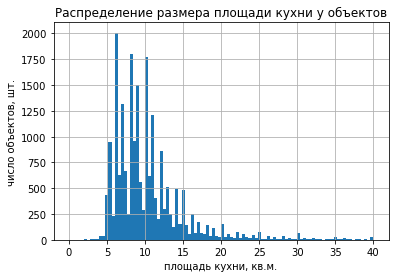

In [106]:
data['kitchen_area_m2'].hist(bins=100, range = (0, 40))
plt.xlabel('площадь кухни, кв.м.')
plt.ylabel('число объектов, шт.')
plt.title('Распределение размера площади кухни у объектов')

In [107]:
kitchen_area_m2_nan = data[data['kitchen_area_m2'].isna()] # смотрим сразу на данные living_area_m2
display(kitchen_area_m2_nan)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type,area_liv_corr
3,санкт-петербург,3,159.00,64900000.00,9,14,NaN,NaN,NaN,0.00,2015-07-24T00:00:00,424.00,6.80,NaN,False,False,0.08,2.00,3.00,0.23,28.10,0,6.80,не определен,408176.10,другой,NaN
30,коммунар,1,32.80,2200000.00,2,9,NaN,NaN,NaN,NaN,2018-02-19T00:00:00,63.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,12,NaN,не определен,67073.17,другой,NaN
37,красный бор,2,45.80,1990000.00,1,5,NaN,NaN,2.50,NaN,2017-10-28T00:00:00,196.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,10,NaN,поселок городского типа,43449.78,первый,NaN
44,санкт-петербург,1,40.00,5350000.00,3,22,NaN,NaN,NaN,1.00,2018-11-18T00:00:00,NaN,11.60,NaN,False,False,0.62,1.00,1.00,1.15,30.47,13,11.60,не определен,133750.00,другой,NaN
59,санкт-петербург,1,46.50,6300000.00,13,13,NaN,NaN,NaN,NaN,2017-03-06T00:00:00,336.00,14.50,NaN,False,False,NaN,0.00,0.00,NaN,11.12,15,14.50,не определен,135483.87,последний,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,никольское,1,40.50,2414306.00,10,18,19.60,NaN,2.56,NaN,2016-09-08T00:00:00,627.00,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,1,NaN,не определен,59612.49,другой,0.48
23663,санкт-петербург,4,88.00,6400000.00,1,10,NaN,NaN,2.55,NaN,2018-01-12T00:00:00,59.00,13.94,NaN,False,False,NaN,0.00,2.00,0.84,33.64,12,13.94,не определен,72727.27,первый,NaN
23670,синявино,1,45.60,2450000.00,2,9,NaN,NaN,2.80,NaN,2018-02-08T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,9,NaN,поселок городского типа,53728.07,другой,NaN
23679,сосновый бор,1,35.00,2500000.00,4,9,NaN,NaN,NaN,NaN,2017-12-08T00:00:00,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,0,NaN,не определен,71428.57,другой,NaN


Text(0.5, 1.0, 'проверка взаимосвязи размера площади кухни и общей площади у объектов')

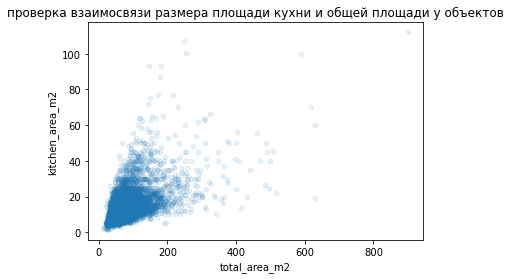

In [108]:
data.plot(x='total_area_m2', y='kitchen_area_m2', kind='scatter', alpha=0.1)
plt.title('проверка взаимосвязи размера площади кухни и общей площади у объектов')

Text(0.5, 1.0, 'проверка взаимосвязи размера площади кухни и общей площади у объектов')

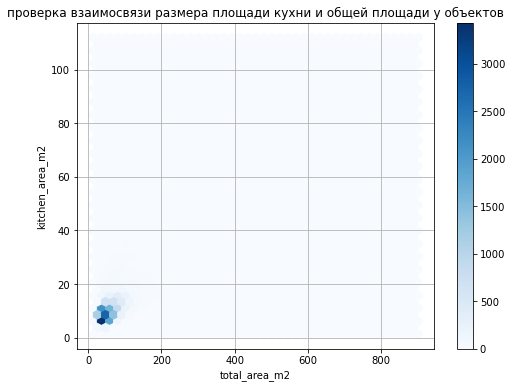

In [109]:
data.plot(x='total_area_m2', y='kitchen_area_m2', kind='hexbin',
          gridsize=40, figsize=(8, 6), cmap="Blues", sharex=False, grid=True)
plt.title('проверка взаимосвязи размера площади кухни и общей площади у объектов')

Развернуть этот график не удалось, не смог пока найти способ.

In [110]:
print(data['total_area_m2'].corr(data['kitchen_area_m2'])) # посчитаем коэффициент Пирсона

0.6092476784548313


Здесь корреляция более слабая, но есть.

2.8.1. area_kitch_corr - соотношение площади кухни и общей площади<br/>
В задании надо посчитать соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [111]:
data['area_kitch_corr'] = data['kitchen_area_m2'] / data['total_area_m2']

In [112]:
data[['area_kitch_corr']].describe()

,area_kitch_corr
count,21343.00
mean,0.19
std,0.07
min,0.03
25%,0.13
50%,0.17
75%,0.23
max,0.79


Text(0.5, 1.0, 'Распределение значения коэффициента area_kitch_corr')

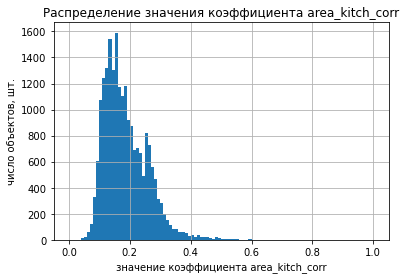

In [113]:
data['area_kitch_corr'].hist(bins=100, range = (0, 1))
plt.xlabel('значение коэффициента area_kitch_corr')
plt.ylabel('число объектов, шт.')
plt.title('Распределение значения коэффициента area_kitch_corr')

Text(0.5, 1.0, 'Проверка взаимосвязи коэффициента area_kitch_corr и total_area_m2')

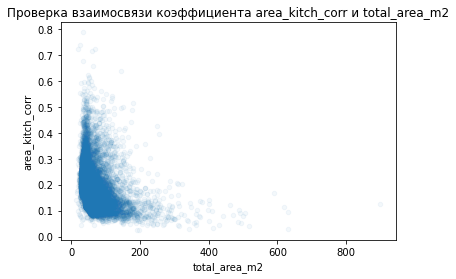

In [114]:
data.plot(x='total_area_m2', y='area_kitch_corr', kind='scatter', alpha=0.05)
plt.title('Проверка взаимосвязи коэффициента area_kitch_corr и total_area_m2')

Text(0.5, 1.0, 'Проверка взаимосвязи коэффициента area_kitch_corr и total_area_m2')

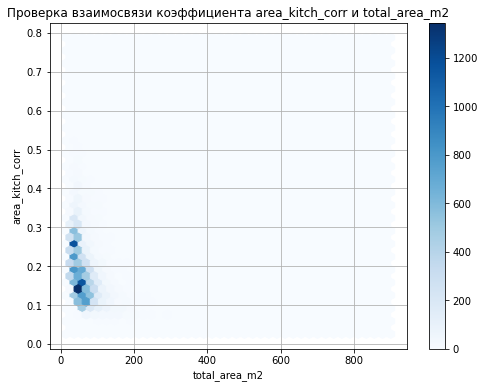

In [115]:
data.plot(x='total_area_m2', y='area_kitch_corr', kind='hexbin',
          gridsize=40, figsize=(8, 6), cmap="Blues", sharex=False, grid=True)
plt.title('Проверка взаимосвязи коэффициента area_kitch_corr и total_area_m2')

**2.9. ceiling_height_m — высота потолков (м)**<br/>
14481 non-null  float64

In [116]:
data['ceiling_height_m'].value_counts(dropna=False)

NaN     9084
2.50    3515
2.60    1645
2.70    1571
3.00    1108
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height_m, Length: 184, dtype: int64

In [117]:
data[['ceiling_height_m']].describe()

,ceiling_height_m
count,14481.00
mean,2.77
std,1.26
min,1.00
25%,2.51
50%,2.65
75%,2.80
max,100.00


Text(0.5, 1.0, 'Распределение значения высоты потолков у объектов')

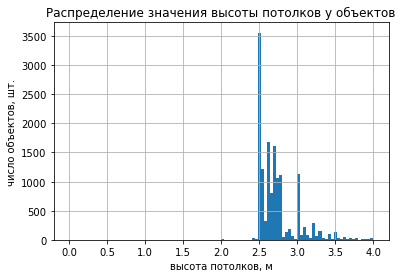

In [118]:
data['ceiling_height_m'].hist(bins=100, range = (0, 4))
plt.xlabel('высота потолков, м')
plt.ylabel('число объектов, шт.')
plt.title('Распределение значения высоты потолков у объектов')

Сразу интересно посчитать среднюю высоту потолков в домах разной этажности.

In [119]:
ceiling_height_m_stat = data.groupby('floors_total').agg(
    number_object=('ceiling_height_m','count'),median=('ceiling_height_m','median'),mean=('ceiling_height_m','mean'))
display(ceiling_height_m_stat)

,number_object,median,mean
floors_total,,,
1,10,2.80,2.74
2,213,2.70,3.01
3,399,2.80,2.97
4,787,3.00,2.99
5,3662,2.55,2.79
6,618,3.00,3.12
7,397,3.00,2.95
8,219,2.80,2.86
9,2557,2.55,2.60


Судя по всему, много ошибок при вводе. Неправильная постановка запятых. Судя по посчитанным на объектах определенной этажности средним и медианных значениям, разброс реальных значений не так уж и велик, всего несколько значений.
<br/>Лучше выдавать клиентам несколько значений на выбор и дать опцию произвольного значения, в случае, если его нет в стандартных. <br/>
Надо бы заменить вначале все значения выше 3,5м и ниже 2м на медианное. А потом заменить отсутствующие на соответствующие данные по этажности дома по медианному значению.

И это придется делать, потому как в самом последнем задании присутствует высота потолков. Учитывая, что мы не совсем знаем достоверную медианную для каждой серии домов, см. 36 этаж и 33 выше например - менять все будем на единое медианное значение.

In [120]:
data['ceiling_height_m'].median() 

2.65

In [121]:
ceiling_height_m_median = 2.65

data['ceiling_height_m'].fillna(ceiling_height_m_median, inplace = True)

data.loc[data['ceiling_height_m'] > 3.5, 'ceiling_height_m'] = 2.65 # делаем замену значений в столбце
data.loc[data['ceiling_height_m'] < 2, 'ceiling_height_m'] = 2.65 # делаем замену значений в столбце
data['ceiling_height_m'].value_counts(dropna=False)

2.65    10063
2.50     3515
2.60     1645
2.70     1571
3.00     1108
        ...  
2.34        1
3.39        1
3.43        1
3.44        1
3.48        1
Name: ceiling_height_m, Length: 110, dtype: int64

**2.10. balcony — число балконов**<br/>
12090 non-null  float64

In [122]:
data['balcony'].value_counts(dropna=False)

NaN     11475
1.00     4187
0.00     3680
2.00     3656
5.00      304
4.00      182
3.00       81
Name: balcony, dtype: int64

In [123]:
data['balcony'].isnull().sum() / data['balcony'].shape[0] * 100 # смотрим % пропущенных показателей.

48.6950986632718

Пропущено 11475 значений. Учитываая, что это высокий процент48,7%, версия - непроставленные клиентом значения. Поэтому нет особого смысла заменять эти данные на нули. И хорошо бы вначале понять, насколько этот показатель значим для продажи.

**2.11. days_exposition — сколько дней было размещено объявление (от публикации до снятия) и first_day_exposition — дата публикации**<br/>
first_day_exposition    23565 non-null  object 
days_exposition         20394 non-null  float64

In [124]:
data['days_exposition'].value_counts(dropna=False)

NaN        3171
45.00       879
60.00       538
7.00        234
30.00       208
           ... 
964.00        1
1147.00       1
1228.00       1
1112.00       1
971.00        1
Name: days_exposition, Length: 1140, dtype: int64

Пропущено 3171 значений. Не означает ли это, что это еще свежие данные, еще тогда находившиеся в базе? Хотя посмотрим данные по дате первого появления. Если все даты старые, то отсутствующие значения есть смысл заменить на медианные.

In [125]:
data['first_day_exposition'].value_counts(dropna=False)

2018-02-01T00:00:00    366
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-05-09T00:00:00      1
2016-08-26T00:00:00      1
2016-07-22T00:00:00      1
2016-12-30T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1489, dtype: int64

Заменим тип данных на datetime и далее добавим новые столбцы - день недели, месяц и год публикации объявления

In [126]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [127]:
data[['first_day_exposition']].describe(datetime_is_numeric = True) # жаль, что не будет такой возможности в будущем.
# datetime_is_numeric = True - для отключения предупреждения

,first_day_exposition
count,23565
mean,2017-11-10 08:59:53.125398016
min,2014-11-27 00:00:00
25%,2017-05-15 00:00:00
50%,2017-12-12 00:00:00
75%,2018-08-26 00:00:00
max,2019-05-03 00:00:00


In [128]:
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['weekday'] = data['first_day_exposition'].dt.weekday
display(data) # и посмотрим, в первый раз делаем, даже в календаре посмотрю хотя бы одну дату ))

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type,area_liv_corr,area_kitch_corr,month,year,weekday
0,санкт-петербург,3,108.00,13000000.00,8,16,51.00,25.00,2.70,NaN,2019-03-07,NaN,16.03,NaN,False,False,0.48,1.00,2.00,0.76,18.86,20,16.03,не определен,120370.37,другой,0.47,0.23,3,2019,3
1,шушары,1,40.40,3350000.00,1,11,18.60,11.00,2.65,2.00,2018-12-04,81.00,18.60,NaN,False,False,NaN,0.00,0.00,NaN,12.82,7,18.60,поселок,82920.79,первый,0.46,0.27,12,2018,1
2,санкт-петербург,2,56.00,5196000.00,4,5,34.30,8.30,2.65,0.00,2015-08-20,558.00,13.93,NaN,False,False,0.09,1.00,2.00,0.57,21.74,10,13.93,не определен,92785.71,другой,0.61,0.15,8,2015,3
3,санкт-петербург,3,159.00,64900000.00,9,14,NaN,NaN,2.65,0.00,2015-07-24,424.00,6.80,NaN,False,False,0.08,2.00,3.00,0.23,28.10,0,6.80,не определен,408176.10,другой,NaN,NaN,7,2015,4
4,санкт-петербург,2,100.00,10000000.00,13,14,32.00,41.00,3.03,NaN,2018-06-19,121.00,8.10,NaN,False,False,0.11,2.00,1.00,0.05,31.86,2,8.10,не определен,100000.00,другой,0.32,0.41,6,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,санкт-петербург,3,133.81,9700000.00,3,5,73.30,13.83,2.65,NaN,2017-03-21,NaN,4.23,NaN,False,False,0.80,1.00,3.00,0.38,24.66,9,4.23,не определен,72490.85,другой,0.55,0.10,3,2017,1
23695,тосно,3,59.00,3100000.00,4,5,38.00,8.50,2.65,NaN,2018-01-15,45.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,14,NaN,не определен,52542.37,другой,0.64,0.14,1,2018,0
23696,рождествено,2,56.70,2500000.00,1,3,29.70,NaN,2.65,NaN,2018-02-11,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,18,NaN,село,44091.71,первый,0.52,NaN,2,2018,6
23697,санкт-петербург,2,76.75,11475000.00,12,17,NaN,23.30,3.00,2.00,2017-03-28,602.00,10.36,NaN,False,False,0.17,2.00,3.00,0.20,39.14,13,10.36,не определен,149511.40,другой,NaN,0.30,3,2017,1


In [129]:
data[['days_exposition']].describe()

,days_exposition
count,20394.00
mean,180.74
std,219.73
min,1.00
25%,45.00
50%,95.00
75%,231.00
max,1580.00


Text(0.5, 1.0, 'Распределение значения количества дней, потребовавшихся для продажи объектов')

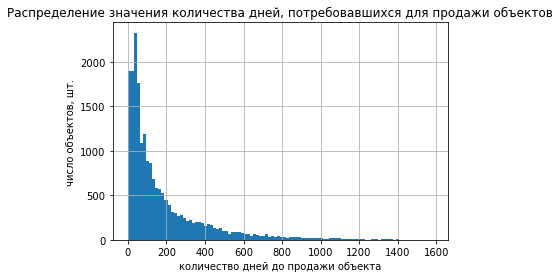

In [130]:
data['days_exposition'].hist(bins=100, range = (0, 1580))
plt.xlabel('количество дней до продажи объекта')
plt.ylabel('число объектов, шт.')
plt.title('Распределение значения количества дней, потребовавшихся для продажи объектов')

Text(0.5, 1.0, 'количество дней, потребовавшихся для продажи объектов, не более 200')

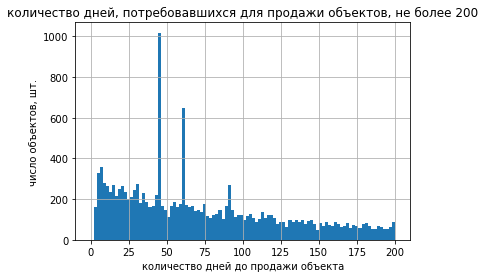

In [131]:
data['days_exposition'].hist(bins=100, range = (0, 200))
plt.xlabel('количество дней до продажи объекта')
plt.ylabel('число объектов, шт.')
plt.title('количество дней, потребовавшихся для продажи объектов, не более 200')

Text(0.5, 1.0, 'количество дней, потребовавшихся для продажи объектов, не более 100')

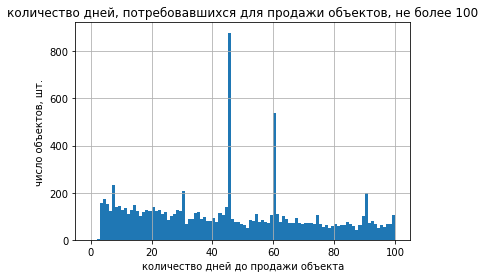

In [132]:
data['days_exposition'].hist(bins=100, range = (0, 100))
plt.xlabel('количество дней до продажи объекта')
plt.ylabel('число объектов, шт.')
plt.title('количество дней, потребовавшихся для продажи объектов, не более 100')

Посмотрим эти объекты с пиками

In [133]:
#pd.set_option('display.max_rows', 500)
days_exposition_stat = data.query(
    'days_exposition == 7 | days_exposition == 30 | days_exposition == 45 | days_exposition == 60 | days_exposition == 90') # посмотрим данные квартиры на пиках
display(days_exposition_stat.head(5)) 

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type,area_liv_corr,area_kitch_corr,month,year,weekday
11,ломоносов,2,44.00,3300000.00,4,5,31.00,6.00,2.65,1.00,2018-08-27,7.00,51.68,False,False,False,NaN,0.00,0.00,NaN,48.25,9,51.68,не определен,75000.00,другой,0.70,0.14,8,2018,0
22,кудрово,2,58.00,5000000.00,15,25,30.00,11.00,2.75,2.00,2017-04-24,60.00,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,20,NaN,деревня,86206.90,другой,0.52,0.19,4,2017,0
82,шушары,3,80.50,4500000.00,16,25,NaN,NaN,2.65,NaN,2018-01-15,60.00,18.22,NaN,False,False,NaN,0.00,0.00,NaN,12.43,3,18.22,поселок,55900.62,другой,NaN,NaN,1,2018,0
105,санкт-петербург,1,32.00,4900000.00,5,25,15.00,9.00,2.65,NaN,2018-01-07,60.00,15.60,NaN,False,False,NaN,0.00,1.00,0.46,52.48,12,15.60,не определен,153125.00,другой,0.47,0.28,1,2018,6
118,санкт-петербург,1,31.00,4500000.00,4,9,17.00,5.00,2.50,NaN,2019-02-24,60.00,9.09,NaN,False,False,NaN,0.00,2.00,0.44,35.45,8,9.09,не определен,145161.29,другой,0.55,0.16,2,2019,6


Странные пики

  
Смотрим, первый пик на уровне 1 недели, второй на уровне 30 дней, третий на уровне 45 дней, четвертый на уровне 60 дней, пятый на уровне 90 дней. Цифры круглые.<br/>
Даты постановки этих объектов в базу в целом не совпадают, не похоже на разовые групповые операции, см. выше. <br/>
Основная версия, что это действие объясняется тактической попыткой обнуления срока времени продажи (экспозиции) объекта агенствами недвижимости, которые являются операторами этих объектов. Думаю, что после снятия с продажи они снова поставят объекты на продажу и они будут, как новые. У покупателей же высокий срок непродажи объекта должен вызывать некоторое уже изначальное недоверие к объекту. Вот агенства и решают данную проблему.
<br/>
days_exposition - получается, что это правильное название столбца, аккуратное. Это количество дней экспозиции данного объекта, что не равно, в целом, количеству дней для его продажи...

**2.12. citycenters_nearest_km — расстояние до центра города (м)**<br/>
citycenters_nearest_km  18064 non-null  float64


In [134]:
data['citycenters_nearest_km'].value_counts(dropna=False)

NaN      5501
8.46       61
20.80      32
10.72      30
8.43       27
         ... 
1.51        1
1.81        1
15.78       1
25.62       1
6.26        1
Name: citycenters_nearest_km, Length: 7624, dtype: int64

In [135]:
data[['citycenters_nearest_km']].describe()

,citycenters_nearest_km
count,18064.00
mean,14.19
std,8.61
min,0.18
25%,9.24
50%,13.10
75%,16.29
max,65.97


Интересно, в спсике несколько городов, от центра каждого считается или имеется ввиду только Санкт-Петербург?

In [136]:
data_nospb[['citycenters_nearest_km']].describe()

,citycenters_nearest_km
count,2479.00
mean,30.60
std,9.07
min,17.01
25%,24.74
50%,30.37
75%,33.72
max,65.97


Судя по всему, что только Санкт-Петербург, вне его расстояние до центра только  более 17 км

In [137]:
data_spb[['citycenters_nearest_km']].describe()

,citycenters_nearest_km
count,15660.00
mean,11.60
std,4.84
min,0.18
25%,8.33
50%,12.24
75%,14.94
max,29.49


In [138]:
data_spb['citycenters_nearest_km'].value_counts(dropna=False)

8.46     61
NaN      61
20.80    32
10.72    30
8.43     27
         ..
15.06     1
15.18     1
12.95     1
5.05      1
6.26      1
Name: citycenters_nearest_km, Length: 6300, dtype: int64

В Санкт-Петербурге только 61 значение пропущено. Тогда их легче и убрать совсем, если подсчеты по ним будут.

**2.13. is_apartment — апартаменты (булев тип)**<br/>
is_apartment            2760 non-null   object<br/>
апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

In [139]:
data['is_apartment'].value_counts(dropna=False)

NaN      20805
False     2710
True        50
Name: is_apartment, dtype: int64

20805 пропущенных значений. Хотелось бы посмотреть, насколько 50 имеющихся отличаются от других.

In [140]:
data_apartment = data.query('is_apartment == True') # смотрим апартаменты
display(data_apartment)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type,area_liv_corr,area_kitch_corr,month,year,weekday
543,петергоф,2,56.60,12790000.00,1,3,29.40,NaN,3.50,NaN,2018-11-06,NaN,30.44,True,False,False,0.05,3.00,3.00,0.02,35.25,11,30.44,не определен,225971.73,первый,0.52,NaN,11,2018,1
916,санкт-петербург,2,70.00,8183000.00,3,3,40.00,NaN,3.12,2.00,2018-01-11,179.00,21.73,True,False,False,NaN,0.00,1.00,0.75,45.80,11,21.73,не определен,116900.00,последний,0.57,NaN,1,2018,3
1109,санкт-петербург,2,95.80,34878556.00,5,6,58.30,20.00,2.65,1.00,2014-12-09,1572.00,0.32,True,False,False,0.16,2.00,3.00,0.57,21.86,1,0.32,не определен,364076.78,другой,0.61,0.21,12,2014,1
1608,санкт-петербург,1,20.10,2150000.00,1,9,NaN,NaN,2.65,NaN,2019-01-30,13.00,12.15,True,False,False,NaN,0.00,0.00,NaN,26.65,12,12.15,не определен,106965.17,первый,NaN,NaN,1,2019,2
2759,всеволожск,3,152.00,7500000.00,1,3,NaN,NaN,3.00,1.00,2018-07-27,7.00,NaN,True,False,False,NaN,NaN,NaN,NaN,NaN,11,NaN,не определен,49342.11,первый,NaN,NaN,7,2018,4
2975,санкт-петербург,1,42.90,4931398.00,3,4,20.39,10.29,3.15,NaN,2018-07-23,273.00,20.80,True,False,False,NaN,0.00,1.00,0.79,44.87,9,20.80,не определен,114951.00,другой,0.48,0.24,7,2018,0
3067,выборг,2,95.00,6600000.00,7,7,45.00,25.00,2.65,2.00,2018-09-08,96.00,NaN,True,False,False,NaN,NaN,NaN,NaN,NaN,13,NaN,не определен,69473.68,последний,0.47,0.26,9,2018,5
3816,санкт-петербург,1,53.10,4779000.00,6,13,19.80,15.90,2.65,2.00,2016-05-16,60.00,4.52,True,False,False,NaN,0.00,1.00,0.83,19.40,4,4.52,не определен,90000.00,другой,0.37,0.30,5,2016,0
3951,санкт-петербург,1,50.00,4300000.00,9,11,17.00,12.00,3.00,2.00,2019-04-20,NaN,11.37,True,False,False,NaN,0.00,0.00,NaN,10.14,10,11.37,не определен,86000.00,другой,0.34,0.24,4,2019,5
4339,санкт-петербург,3,72.00,6900000.00,1,4,70.00,NaN,3.50,NaN,2019-03-25,22.00,4.47,True,False,False,0.35,2.00,1.00,0.44,31.49,19,4.47,не определен,95833.33,первый,0.97,NaN,3,2019,0


In [141]:
data_apartment.describe()

,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,days_exposition,citycenters_nearest_km,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,price_m2,area_liv_corr,area_kitch_corr,month,year,weekday
count,50.00,50.00,50.00,50.00,50.00,42.00,35.00,50.00,31.00,38.00,43.00,19.00,43.00,43.00,30.00,41.00,50.00,43.00,50.00,42.00,35.00,50.00,50.00,50.00
mean,2.08,83.33,12924200.66,4.48,6.90,47.98,17.73,2.86,2.06,258.74,14.85,0.26,0.95,1.23,0.53,33.17,11.16,14.85,148353.73,0.57,0.23,6.58,2017.58,2.20
std,1.21,74.02,16169673.45,3.97,5.22,49.46,15.75,0.24,1.31,389.76,11.14,0.20,1.17,1.15,0.26,12.96,5.96,11.14,115630.82,0.14,0.11,3.60,1.26,1.78
min,1.00,20.10,2150000.00,1.00,2.00,13.92,5.00,2.50,1.00,6.00,0.32,0.00,0.00,0.00,0.02,8.43,0.00,0.32,40816.33,0.33,0.09,1.00,2014.00,0.00
25%,1.00,47.80,4815750.00,2.00,4.00,20.42,10.00,2.65,1.00,19.75,5.74,0.12,0.00,0.00,0.32,24.31,8.00,5.74,93654.42,0.48,0.15,3.25,2017.25,1.00
50%,2.00,64.00,6900000.00,3.00,5.00,33.25,11.70,2.80,2.00,78.00,13.26,0.16,0.00,1.00,0.57,31.01,11.00,13.26,113866.50,0.56,0.22,7.00,2018.00,2.00
75%,3.00,95.95,12467675.25,5.00,7.00,55.70,20.00,3.00,2.00,276.75,20.80,0.36,2.00,2.50,0.79,44.87,16.00,20.80,143260.70,0.67,0.28,10.00,2018.00,3.00
max,7.00,507.00,84000000.00,22.00,27.00,301.50,87.20,3.50,5.00,1572.00,54.49,0.71,3.00,3.00,0.83,73.39,20.00,54.49,600000.00,0.97,0.49,12.00,2019.00,6.00


Не вижу особых отличий.

**2.14. studio — квартира-студия (булев тип)**<br/>
studio                  23565 non-null  bool<br/>


In [142]:
data['studio'].value_counts(dropna=False)

False    23419
True       146
Name: studio, dtype: int64

И помним, что площадь кухни здесь равна 0

**2.15. open_plan — свободная планировка (булев тип)**<br/>
open_plan               23565 non-null  bool<br/>

In [143]:
data['open_plan'].value_counts(dropna=False)

False    23498
True        67
Name: open_plan, dtype: int64

**2.16. Остальные столбцы: parks_nearest_km parks_around_3km ponds_around_3km ponds_nearest_km airports_nearest_km total_images**<br/>

parks_nearest_km        8030 non-null   float64<br/>       
parks_around_3km        18065 non-null  float64<br/>       
ponds_around_3km        18065 non-null  float64 <br/>      
ponds_nearest_km        9036 non-null   float64 <br/>      
airports_nearest_km     18041 non-null  float64 <br/>      
total_images            23565 non-null  int64         

In [144]:
data['parks_nearest_km'].value_counts(dropna=False)

NaN     15535
0.44       67
0.39       41
0.17       41
0.46       40
        ...  
0.92        1
1.42        1
0.77        1
1.12        1
2.98        1
Name: parks_nearest_km, Length: 995, dtype: int64

In [145]:
data_spb[['parks_nearest_km']].describe()

,parks_nearest_km
count,7284.00
mean,0.50
std,0.35
min,0.00
25%,0.29
50%,0.46
75%,0.62
max,3.19


Интересно, а сколько у нас квартир прямо в парке?

In [146]:
data_park = data.query('parks_nearest_km < 0.01') # что за объекты в парке?
display(data_park)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type,area_liv_corr,area_kitch_corr,month,year,weekday
2527,кронштадт,2,60.30,4690000.00,2,5,28.00,7.90,2.50,0.00,2016-03-05,146.00,51.50,NaN,False,False,0.01,3.00,3.00,0.34,69.78,8,51.50,не определен,77777.78,другой,0.46,0.13,3,2016,5
9344,санкт-петербург,1,28.10,3000000.00,1,9,17.00,5.60,2.50,NaN,2017-07-25,440.00,11.66,NaN,False,False,0.01,1.00,1.00,0.78,12.05,12,11.66,не определен,106761.57,первый,0.60,0.20,7,2017,1
11949,санкт-петербург,2,44.00,4500000.00,7,9,30.00,7.00,2.60,NaN,2017-11-24,82.00,12.29,NaN,False,False,0.00,1.00,1.00,0.51,11.81,7,12.29,не определен,102272.73,другой,0.68,0.16,11,2017,4
14624,санкт-петербург,2,45.40,3770000.00,2,9,28.43,6.90,2.65,NaN,2019-03-20,42.00,16.44,NaN,False,False,0.00,1.00,0.00,NaN,43.93,8,16.44,не определен,83039.65,другой,0.63,0.15,3,2019,2
20193,санкт-петербург,3,102.60,11809670.00,3,9,NaN,17.80,2.65,2.00,2017-04-21,90.00,6.41,False,False,False,0.01,2.00,2.00,0.48,27.56,3,6.41,не определен,115104.00,другой,NaN,0.17,4,2017,4
22941,зеленогорск,1,69.30,10965000.00,4,4,48.90,NaN,3.00,2.00,2019-01-10,110.00,54.49,True,False,False,0.00,3.00,1.00,0.22,73.39,8,54.49,не определен,158225.11,последний,0.71,NaN,1,2019,3


Ну, не так много

In [147]:
data['parks_around_3km'].value_counts(dropna=False)

0.00    10039
1.00     5647
NaN      5500
2.00     1736
3.00      643
Name: parks_around_3km, dtype: int64

In [148]:
data['ponds_around_3km'].value_counts(dropna=False)

0.00    9029
1.00    5662
NaN     5500
2.00    1883
3.00    1491
Name: ponds_around_3km, dtype: int64

In [149]:
data['ponds_nearest_km'].value_counts(dropna=False)

NaN     14529
0.43       69
0.45       41
0.15       40
0.43       39
        ...  
1.24        1
1.27        1
1.25        1
1.06        1
1.13        1
Name: ponds_nearest_km, Length: 1097, dtype: int64

In [150]:
data_spb[['ponds_nearest_km']].describe()

,ponds_nearest_km
count,7983.00
mean,0.52
std,0.28
min,0.01
25%,0.29
50%,0.50
75%,0.74
max,1.34


In [151]:
data['airports_nearest_km'].value_counts(dropna=False)

NaN      5524
37.43      61
21.93      32
44.87      30
39.95      30
         ... 
23.58       1
30.20       1
21.96       1
25.21       1
24.66       1
Name: airports_nearest_km, Length: 8252, dtype: int64

In [152]:
data_spb[['airports_nearest_km']].describe()

,airports_nearest_km
count,15636.00
mean,28.05
std,11.56
min,0.00
25%,18.58
50%,26.76
75%,36.61
max,54.78


Интересно, что за объекты в самом аэропорту, посмотрим

In [153]:
data_airports = data.query('airports_nearest_km < 5') # что за объекты в аэропорту?
display(data_airports)

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type,area_liv_corr,area_kitch_corr,month,year,weekday
21085,санкт-петербург,1,34.70,7000000.00,3,9,19.80,6.00,2.70,2.00,2018-09-23,60.00,22.80,NaN,False,False,NaN,0.00,0.00,NaN,0.00,0,22.80,не определен,201729.11,другой,0.57,0.17,9,2018,6


Одна довольно странная однокомнатная квартира с нулевым значением в airports_nearest_km. Похоже на ошибку.

In [154]:
data['total_images'].value_counts(dropna=False)

10    1781
9     1721
20    1690
8     1580
7     1513
6     1477
11    1361
5     1282
12    1220
0     1051
13    1011
14     986
4      968
15     947
1      860
16     760
3      756
17     649
18     642
2      634
19     601
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64

In [155]:
data_spb[['total_images']].describe()

,total_images
count,15721.00
mean,10.18
std,5.75
min,0.00
25%,6.00
50%,10.00
75%,14.00
max,50.00


Text(0.5, 1.0, 'Распределение количества изображений у объектов')

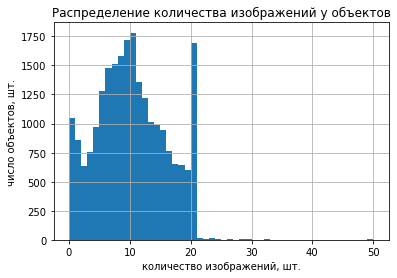

In [156]:
data['total_images'].hist(bins=50, range = (0, 50))
plt.xlabel('количество изображений, шт.')
plt.ylabel('число объектов, шт.')
plt.title('Распределение количества изображений у объектов')

In [157]:
data_total_images = data.query('total_images > 40') # любопытство, хорошее качество для аналитика данных?
display(data_total_images) # и для чего такое количество изображений, хотя квартиры не из дешевых. Ограничено ли количество фоотографий?

,locality_name,rooms,total_area_m2,last_price,floor,floors_total,living_area_m2,kitchen_area_m2,ceiling_height_m,balcony,first_day_exposition,days_exposition,citycenters_nearest_km,is_apartment,studio,open_plan,parks_nearest_km,parks_around_3km,ponds_around_3km,ponds_nearest_km,airports_nearest_km,total_images,citycenters_nearest_km_int,locality_name_type,price_m2,floor_type,area_liv_corr,area_kitch_corr,month,year,weekday
9778,санкт-петербург,2,87.00,11000000.00,11,25,32.50,31.00,2.65,5.00,2017-10-25,3.00,11.65,NaN,False,False,NaN,0.00,0.00,NaN,9.59,50,11.65,не определен,126436.78,другой,0.37,0.36,10,2017,2
12667,санкт-петербург,3,76.00,20500000.00,16,20,47.00,29.00,2.65,NaN,2017-12-10,5.00,16.14,NaN,False,False,NaN,0.00,0.00,NaN,50.81,50,16.14,не определен,269736.84,другой,0.62,0.38,12,2017,6
15157,санкт-петербург,4,138.60,17998000.00,17,18,93.10,16.00,2.65,2.00,2017-09-27,172.00,11.92,NaN,False,False,NaN,0.00,0.00,NaN,34.99,42,11.92,не определен,129855.70,другой,0.67,0.12,9,2017,2
17396,санкт-петербург,4,119.70,14500000.00,3,4,87.50,13.50,2.65,NaN,2017-12-02,106.00,2.41,NaN,False,False,0.55,1.00,2.00,0.62,24.38,50,2.41,не определен,121136.17,другой,0.73,0.11,12,2017,5


Обзор закончен, далее выводы и действия по заданию.

**2.17. Основные выводы по данному этапу и действия по по некоторым столбцам**

У меня совсем нет опыта в подобной обработке. Первичные выводы по всем колонкам уже были сделаны в конкретных пунктах выше. Многое в дальнейших выводах и дальнейших действиях определяется этим.

2.17.1. Высоко оценил нормальное распределение значений по созданному столбцу price_m2 и считаю, что это один из основных показателей нормальности объекта. И чтобы исключить основные выбросы, нужно оставить в данных не по квартилям, а диапазон от 5% до 95% по данному параметру.

2.17.2. Далее надо бы посчитать в оставшемся массиве основные данные по отдельным первым десяти городам. Нам же важно понять, однородный ли это массив. Если основные цифры по городам значимо разнятся, то и смысла их нет совместно считать. Лучше это сделать по первоначальному массиву и уже без выбросов по price_m2

2.17.3. И для высоты потолков надо бы ввести коррекцию, если это будет необходимо для следующих работ.

In [158]:
data_price_m2 = data.copy()

In [159]:
quan_5 = data_price_m2['price_m2'].quantile(0.05)
quan_95 = data_price_m2['price_m2'].quantile(0.95)
quan_price_m2_5_95 = (data_price_m2['price_m2'] >= quan_5) & (data_price_m2['price_m2'] <= quan_95)
data_price_m2 = data_price_m2.loc[quan_price_m2_5_95]
data_price_m2[['price_m2']].describe()


,price_m2
count,21208.00
mean,95732.34
std,24980.58
min,41237.11
25%,78947.37
50%,95000.00
75%,111666.67
max,160714.29


In [160]:
data[['price_m2']].describe([0.05, .125, .25, .5, .75, .875, .95]) #http://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.DataFrame.describe.html

,price_m2
count,23565.00
mean,99405.84
std,50389.43
min,111.83
5%,41234.44
12.5%,60383.15
25%,76566.13
50%,95000.00
75%,114213.20
87.5%,132891.81


Получилось. А сейчас посмотрим, что там осталось с пропущенными данными.

In [161]:
data.isnull().sum() / data.shape[0] * 100 # смотрим % пропущенных показателей.

locality_name                 0.00
rooms                         0.00
total_area_m2                 0.00
last_price                    0.00
floor                         0.00
floors_total                  0.00
living_area_m2                7.91
kitchen_area_m2               9.43
ceiling_height_m              0.00
balcony                      48.70
first_day_exposition          0.00
days_exposition              13.46
citycenters_nearest_km       23.34
is_apartment                 88.29
studio                        0.00
open_plan                     0.00
parks_nearest_km             65.92
parks_around_3km             23.34
ponds_around_3km             23.34
ponds_nearest_km             61.65
airports_nearest_km          23.44
total_images                  0.00
citycenters_nearest_km_int   23.34
locality_name_type            0.00
price_m2                      0.00
floor_type                    0.00
area_liv_corr                 7.91
area_kitch_corr               9.43
month               

In [162]:
data_price_m2.isnull().sum() / data_price_m2.shape[0] * 100 # немного убрали и пропущенные значения.

locality_name                 0.00
rooms                         0.00
total_area_m2                 0.00
last_price                    0.00
floor                         0.00
floors_total                  0.00
living_area_m2                7.27
kitchen_area_m2               9.04
ceiling_height_m              0.00
balcony                      47.94
first_day_exposition          0.00
days_exposition              12.37
citycenters_nearest_km       20.36
is_apartment                 88.15
studio                        0.00
open_plan                     0.00
parks_nearest_km             65.92
parks_around_3km             20.35
ponds_around_3km             20.35
ponds_nearest_km             61.34
airports_nearest_km          20.41
total_images                  0.00
citycenters_nearest_km_int   20.36
locality_name_type            0.00
price_m2                      0.00
floor_type                    0.00
area_liv_corr                 7.27
area_kitch_corr               9.04
month               

In [163]:
locality_name_stat = data_price_m2.groupby('locality_name').agg(
    object_count=('total_area_m2','count'),total_area_m2_median=('total_area_m2','median'),
    price_m2_median=('price_m2','median'),last_price_median=('last_price','median'),
    days_exposition_median=('days_exposition','median'))
locality_name_stat = locality_name_stat.sort_values('object_count', ascending = False)
display(locality_name_stat.head(10))

,object_count,total_area_m2_median,price_m2_median,last_price_median,days_exposition_median
locality_name,,,,,
санкт-петербург,14477,53.50,102537.31,5300000.00,93.00
мурино,586,37.47,86250.38,3400000.00,77.00
кудрово,470,40.00,95555.31,3887500.00,72.00
шушары,439,50.20,76829.27,3950000.00,92.00
всеволожск,393,53.70,65789.47,3480000.00,123.00
пушкин,363,53.00,99706.74,5150000.00,129.50
колпино,338,50.00,74723.75,3600000.00,74.00
парголово,326,42.95,91780.22,4100000.00,81.00
гатчина,301,45.00,67944.25,3100000.00,99.50


Список 10 населённых пунктов с наибольшим числом объявлений.

Из них: <br/>
санкт-петербург - 102537.31 медианное значение цены за кв.м, самая высокая стоимость жилья<br/>
выборг -          59259.26  медианное значение цены за кв.м, самая низкая стоимость жилья

И данные показывают, что это довольно разные ценовые рынки, нет особого смысла сравнивать их далее вместе.

<a name="chapter_3"></a>
**3. Исследовательский анализ данных** <br/>
Часть требуемых данных уже была приведена выше

**3.1. Время продажи квартиры.** <br/>
Учитывая данные из 2.17. - проведем сравнительный анализ для разных географических локальностей.

**санкт-петербург**

In [164]:
city_spb = data_price_m2.loc[data['locality_name'] == 'санкт-петербург']

city_spb[['days_exposition']].describe([0.05, .125, .25, .5, .75, .875, .95])

,days_exposition
count,12697.00
mean,178.65
std,220.59
min,1.00
5%,8.00
12.5%,19.00
25%,42.00
50%,93.00
75%,224.00
87.5%,403.00


Text(0.5, 1.0, 'spb - распределение количества дней экспозиции у объектов')

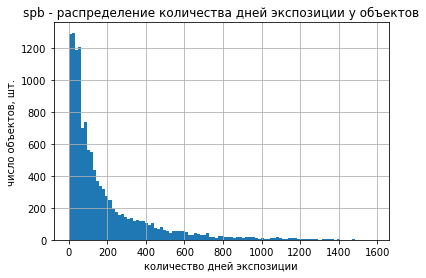

In [165]:
city_spb['days_exposition'].hist(bins=100, range = (0, 1580))
plt.xlabel('количество дней экспозиции')
plt.ylabel('число объектов, шт.')
plt.title('spb - распределение количества дней экспозиции у объектов')

Text(0.5, 1.0, 'spb - распределение количества дней экспозиции у объектов, не более 300 дней')

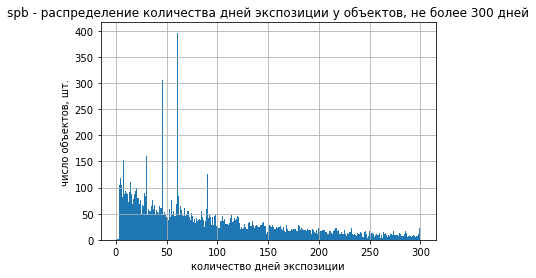

In [166]:
city_spb['days_exposition'].hist(bins=300, range = (0, 300))
plt.xlabel('количество дней экспозиции')
plt.ylabel('число объектов, шт.')
plt.title('spb - распределение количества дней экспозиции у объектов, не более 300 дней')

Text(0.5, 1.0, 'spb - распределение количества дней экспозиции у объектов, не более 100 дней')

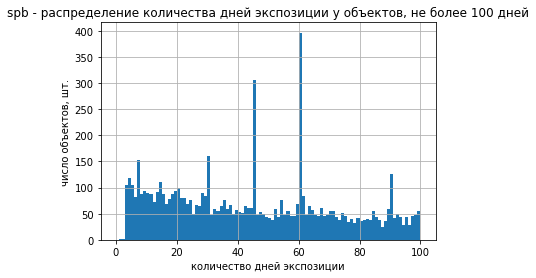

In [167]:
city_spb['days_exposition'].hist(bins=100, range = (0, 100))
plt.xlabel('количество дней экспозиции')
plt.ylabel('число объектов, шт.')
plt.title('spb - распределение количества дней экспозиции у объектов, не более 100 дней')

Text(0.5, 1.0, 'рассмотрение взаимосвязи количества дней экспозиции  и последней цены у объектов')

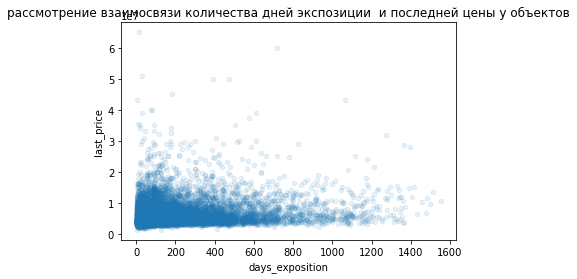

In [168]:
city_spb.plot(x='days_exposition', y='last_price', kind='scatter', alpha=0.1)
plt.title('рассмотрение взаимосвязи количества дней экспозиции  и последней цены у объектов')

Срок продажи квартиры в Санк-Петербурге: <br/>
В 50% случаев продажа недвижимости занимала порядка 3 месяца (93 дней). <br/>
В 25% случаев продажа недвижимости занимала всего 42 дня и это можно считать быстрым процессом.<br/>
И хотя в 5% продажа недвижимости занимала всего 8 дней, не вижу здесь никаких мошеннических действий.<br/>
Если объект не продается дольше 224 дней стоит задумать, это признак долгой продажи.

Несколько пока непонятен пик продаж на 60 день, например. Версия - просто  агенства массово снимают свои объекты с продажи, чтобы обнулить days_exposition и снова разместить объект, как новый.

И продаются, в основном - дешевые объекты.


**Мурино**

In [169]:
city_murino = data_price_m2.loc[data['locality_name'] == 'мурино']

city_murino[['days_exposition']].describe([0.05, .125, .25, .5, .75, .875, .95])

,days_exposition
count,547.00
mean,149.21
std,192.09
min,3.00
5%,8.00
12.5%,19.00
25%,36.50
50%,77.00
75%,179.00
87.5%,314.00


В Мурино объекты недвижимости продаются несколько быстрее, если смотреть в объемах продажи по количеству.

**3.2. Задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."**

Выше было описано много таких артефактов. Но было принято решение убрать только те, которые находятся на самых краях нормального распределения по цене за кв.м price_m2. Зачем убирать данные, если основной параметр у них вполне рыночный. Пришлось еще и высоту потолков применять, потому как они оказались в заключительных пунктах задания.

**3.3. Задание: Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

**санкт-петербург**

3.3.1. Зависимость стоимости квартиры от площади

Text(0.5, 1.0, 'spb - рассмотрение взаимосвязи значения общей площади и последней цены у объектов')

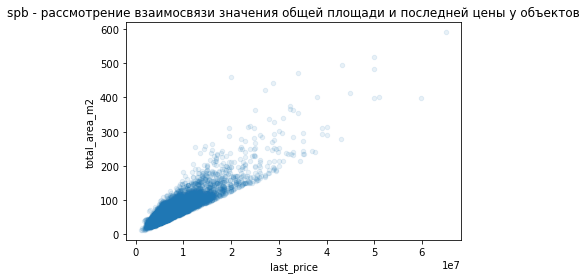

In [170]:
city_spb.plot(x='last_price', y='total_area_m2', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи значения общей площади и последней цены у объектов')

In [171]:
print(city_spb['last_price'].corr(city_spb['total_area_m2'])) # посчитаем коэффициент Пирсона

0.9036876570474799


**Мурино**

Text(0.5, 1.0, 'мурино - рассмотрение взаимосвязи значения общей площади и последней цены у объектов')

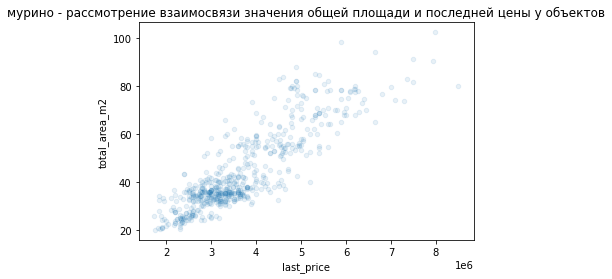

In [172]:
city_murino.plot(x='last_price', y='total_area_m2', kind='scatter', alpha=0.1)
plt.title('мурино - рассмотрение взаимосвязи значения общей площади и последней цены у объектов')

In [173]:
print(city_murino['last_price'].corr(city_murino['total_area_m2'])) # посчитаем коэффициент Пирсона

0.8647652334808941


Да, и в Мурино стоимость квартиры сильно зависит от площади, хотя и несколько слабее, чем в Санк-Петербурге.

3.3.2. Зависимость стоимости квартиры от количества комнат

**санкт-петербург**

Text(0.5, 1.0, 'spb - рассмотрение взаимосвязи последней цены у объектов и количества комнат')

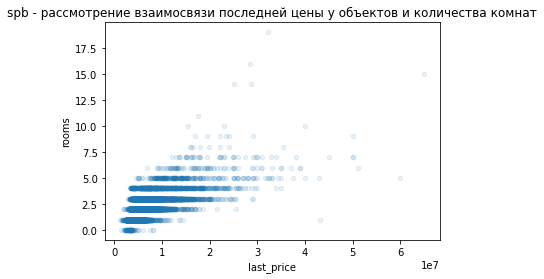

In [174]:
city_spb.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи последней цены у объектов и количества комнат')

In [175]:
print(city_spb['last_price'].corr(city_spb['rooms'])) # посчитаем коэффициент Пирсона

0.6483233099794677


Да, зависит, но зависимость уже слабее.

**Мурино**

Text(0.5, 1.0, 'мурино - рассмотрение взаимосвязи последней цены у объектов и количества комнат')

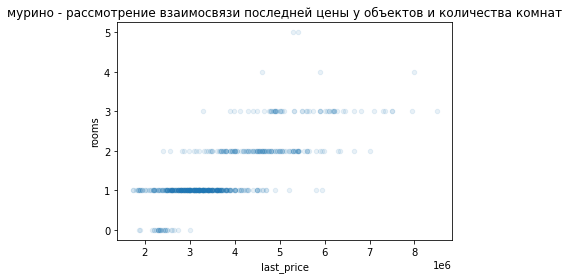

In [176]:
city_murino.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)
plt.title('мурино - рассмотрение взаимосвязи последней цены у объектов и количества комнат')

In [177]:
print(city_murino['last_price'].corr(city_murino['rooms'])) # посчитаем коэффициент Пирсона

0.7634143566141265


Да, зависимость есть и в Мурино количеству комнат придают больше значения, чем в Сакт-Петербурге.

3.3.3. Зависимость стоимости квартиры от удаленности от центра.

**санкт-петербург**

Text(0.5, 1.0, 'spb - рассмотрение взаимосвязи последней цены и расстояния от центра у объектов')

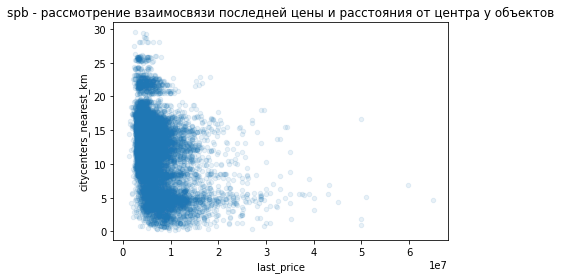

In [178]:
city_spb.plot(x='last_price', y='citycenters_nearest_km', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи последней цены и расстояния от центра у объектов')

In [179]:
print(city_spb['last_price'].corr(city_spb['citycenters_nearest_km'])) # посчитаем коэффициент Пирсона

-0.37218310649525477


Прямой положительной зависимости по всем квартирам не наблюдается. Слабая обратная зависимость.

**Мурино**

Text(0.5, 1.0, 'мурино - рассмотрение взаимосвязи последней цены и расстояния от центра у объектов')

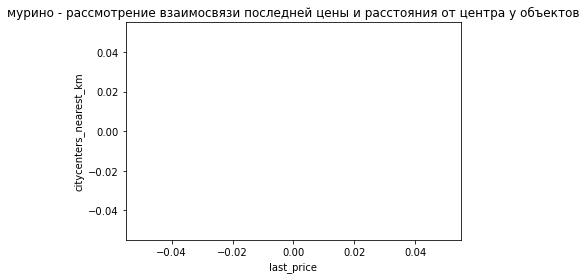

In [180]:
city_murino.plot(x='last_price', y='citycenters_nearest_km', kind='scatter', alpha=0.1)
plt.title('мурино - рассмотрение взаимосвязи последней цены и расстояния от центра у объектов')

In [181]:
print(city_murino['last_price'].corr(city_murino['citycenters_nearest_km']))

nan


Нет данных на эту тему.

3.3.4. Зависимость стоимости квартиры от даты размещения, месяца и года.

**санкт-петербург**

Text(0.5, 1.0, 'spb - рассмотрение взаимосвязи последней цены и месяца постановки объекта')

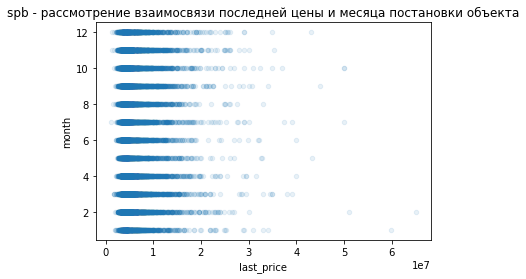

In [182]:
city_spb.plot(x='last_price', y='month', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи последней цены и месяца постановки объекта')

Text(0.5, 1.0, 'spb - рассмотрение взаимосвязи последней цены и года постановки объекта')

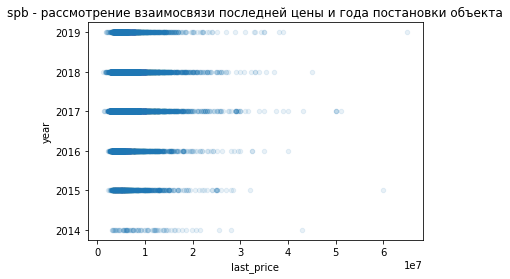

In [183]:
city_spb.plot(x='last_price', y='year', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи последней цены и года постановки объекта')

Text(0.5, 1.0, 'spb - рассмотрение взаимосвязи последней цены и дня недели постановки объекта')

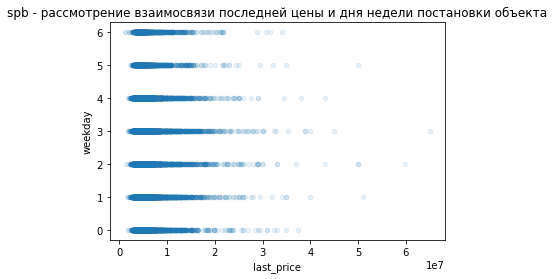

In [184]:
city_spb.plot(x='last_price', y='weekday', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи последней цены и дня недели постановки объекта')

In [185]:
print(city_spb['last_price'].corr(city_spb['month']))
print(city_spb['last_price'].corr(city_spb['year']))
print(city_spb['last_price'].corr(city_spb['weekday']))

-0.0023636243138647527
-0.03191184152611442
-0.010492054559332562


Не наблюдается зависимости

In [186]:
month_name_stat = city_spb.groupby('month').agg(
    month_count=('last_price','count'), month_median=('last_price','median'), month_mean=('last_price','mean'))
month_name_stat = month_name_stat.sort_values('month', ascending = True)
display(month_name_stat)

,month_count,month_median,month_mean
month,,,
1,843,5446075.00,6629059.54
2,1604,5300000.00,6457108.61
3,1569,5400000.00,6511946.02
4,1482,5301202.50,6423072.37
5,797,5200000.00,6517704.81
6,1051,5100000.00,6212021.35
7,1065,5200000.00,6558815.60
8,1106,5225000.00,6218408.91
9,1212,5350000.00,6640994.49


Январь и декабрь выше по медианной цене. Причина в уменьшении объектов, поданных в этих месяцах. Может, В Санк-Петербурге их в эти месяцы пытаются активно сдать в аренду?

Удивляет круглость медианных цифр. Надо бы поискать причину. Скорее всего цифра специально подтягивается к ближайшей круглой?

In [187]:
year_name_stat = city_spb.groupby('year').agg(
    year_count=('last_price','count'), year_median=('last_price','median'), year_mean=('last_price','mean'))
year_name_stat = year_name_stat.sort_values('year', ascending = True)
display(year_name_stat)

,year_count,year_median,year_mean
year,,,
2014,77,8500000.00,10240511.30
2015,763,5830007.00,7310725.34
2016,1711,5250000.00,6465456.94
2017,5119,5100000.00,6303578.20
2018,4995,5260000.00,6335709.18
2019,1812,5600000.00,6712635.32


По годам что-то сложно сказать, в 2014 году было мало объектов, не очень корректно сравнивать

In [188]:
weekday_name_stat = city_spb.groupby('weekday').agg(
    weekday_count=('last_price','count'), weekday_median=('last_price','median'), weekday_mean=('last_price','mean'))
weekday_name_stat = weekday_name_stat.sort_values('weekday', ascending = True)
display(weekday_name_stat)

,weekday_count,weekday_median,weekday_mean
weekday,,,
0,2168,5300000.00,6402915.85
1,2628,5297000.00,6429410.40
2,2454,5300000.00,6583404.80
3,2618,5400000.00,6736132.82
4,2446,5200000.00,6250625.11
5,1146,5200000.00,6277193.79
6,1017,5250000.00,6347691.95


Тут лидер по медианным цифрам - четверг. Меньше объектов регистрируется по выходным. 

**Мурино**

In [189]:
month_name_stat = city_murino.groupby('month').agg(
    month_count=('last_price','count'), month_median=('last_price','median'), month_mean=('last_price','mean'))
month_name_stat = month_name_stat.sort_values('month', ascending = True)
display(month_name_stat)

,month_count,month_median,month_mean
month,,,
1,29,3400000.00,3608751.45
2,42,3377500.00,3694955.79
3,58,3540000.00,3774665.09
4,75,3270000.00,3550711.44
5,32,3210000.00,3568500.00
6,37,3250000.00,3557648.65
7,50,3315750.00,3465265.98
8,49,3215000.00,3630466.76
9,61,3590000.00,3794049.18


In [190]:
year_name_stat = city_murino.groupby('year').agg(
    year_count=('last_price','count'), year_median=('last_price','median'), year_mean=('last_price','mean'))
year_name_stat = year_name_stat.sort_values('year', ascending = True)
display(year_name_stat)

,year_count,year_median,year_mean
year,,,
2014,2,4910000.00,4910000.00
2015,18,3375000.00,3566388.89
2016,49,3300000.00,3487971.02
2017,203,3300000.00,3579990.30
2018,262,3490000.00,3770146.55
2019,52,3687710.00,3798667.21


In [191]:
weekday_name_stat = city_murino.groupby('weekday').agg(
    weekday_count=('last_price','count'), weekday_median=('last_price','median'), weekday_mean=('last_price','mean'))
weekday_name_stat = weekday_name_stat.sort_values('weekday', ascending = True)
display(weekday_name_stat)

,weekday_count,weekday_median,weekday_mean
weekday,,,
0,96,3350000.00,3524012.19
1,114,3300000.00,3532541.96
2,96,3500000.00,3914191.39
3,102,3301260.00,3681108.53
4,95,3650000.00,3747389.23
5,45,3500000.00,3795925.56
6,38,3575000.00,3629044.13


А здесь лидер по медианным цифрам - пятница.

3.3.5. Зависимость стоимости квартиры от того, на каком этаже расположена квартира: первом, последнем или другом.

Text(0.5, 1.0, 'spb - рассмотрение взаимосвязи последней цены и этажа объекта')

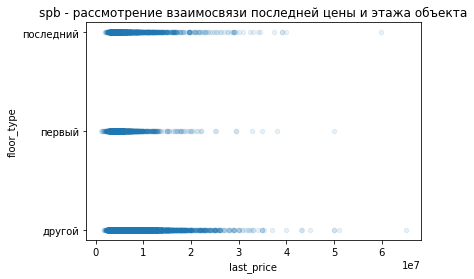

In [192]:
city_spb.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи последней цены и этажа объекта')

In [193]:
floor_type_name_stat = city_spb.groupby('floor_type').agg(
    floor_type_count=('last_price','count'), floor_type_median=('last_price','median'), floor_type_mean=('last_price','mean'))
#floor_type_name_stat = floor_type_name_stat.sort_values('weekday', ascending = True)
display(floor_type_name_stat)

,floor_type_count,floor_type_median,floor_type_mean
floor_type,,,
другой,11208,5400000.00,6510824.75
первый,1543,4800000.00,5598618.94
последний,1726,5300000.00,6891764.90


Можно сказать, что последний этаж по уровню медианных цифр выше объектов с первым этажом. А по средней цифре даже выше и остальных этаже, что несколько удивительно. Можно поискать причину, если будет необходимо ))

**Мурино**

Text(0.5, 1.0, 'мурино - рассмотрение взаимосвязи последней цены и этажа объекта')

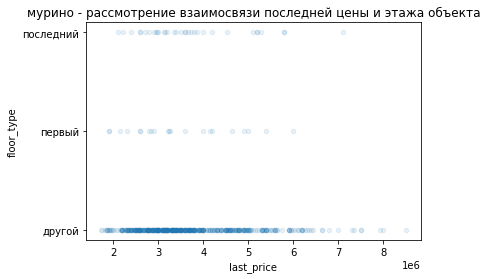

In [194]:
city_murino.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.1)
plt.title('мурино - рассмотрение взаимосвязи последней цены и этажа объекта')

In [195]:
floor_type_name_stat = city_murino.groupby('floor_type').agg(
    floor_type_count=('last_price','count'), floor_type_median=('last_price','median'), floor_type_mean=('last_price','mean'))
#floor_type_name_stat = floor_type_name_stat.sort_values('weekday', ascending = True)
display(floor_type_name_stat)

,floor_type_count,floor_type_median,floor_type_mean
floor_type,,,
другой,532,3400000.00,3684194.11
первый,21,3233007.00,3503545.10
последний,33,3500000.00,3739605.61


А в Мурино последний этаж лидер по всем показателям, хотя колияество таких объектов совсем мало.

3.3.6. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [196]:
citycenters_km_int = data_price_m2.copy()
citycenters_km_int.dropna(subset = ['citycenters_nearest_km_int'], inplace = True) # можно уже и удалить
citycenters_km_int['citycenters_nearest_km_int'] = citycenters_km_int['citycenters_nearest_km_int'].astype(int)
# округление в меньщую сторону, что нам и надо
citycenters_km_int_spb = citycenters_km_int.loc[data_price_m2['locality_name'] == 'санкт-петербург']
#display(citycenters_km_int_spb)

citycenters_km_int_spb_stat = citycenters_km_int_spb.groupby('citycenters_nearest_km_int').agg(
    citycenters_nearest_km_int_count=('last_price','count'), citycenters_nearest_km_int_mean=('last_price','mean'))

display(citycenters_km_int_spb_stat)

,citycenters_nearest_km_int_count,citycenters_nearest_km_int_mean
citycenters_nearest_km_int,,
0,52,11411403.85
1,177,10737124.29
2,251,9990490.84
3,445,9440347.88
4,708,10233488.27
5,572,9618418.30
6,346,8324517.01
7,337,8053034.05
8,598,7380463.63


Уже понятно, что границей центра Санкт-Петербурга в данном случае можно считать окружность радиусом в 8 км. Попробуем и график сделать.

In [197]:
citycenters_km_int_spb_graph = citycenters_km_int_spb.pivot_table(
    index='citycenters_nearest_km_int', values=['price_m2', 'last_price'], aggfunc='mean')
display(citycenters_km_int_spb_graph)

,last_price,price_m2
citycenters_nearest_km_int,,
0,11411403.85,113950.95
1,10737124.29,112435.35
2,9990490.84,110036.64
3,9440347.88,108062.34
4,10233488.27,115459.90
5,9618418.30,114970.64
6,8324517.01,117736.40
7,8053034.05,117628.23
8,7380463.63,112219.89


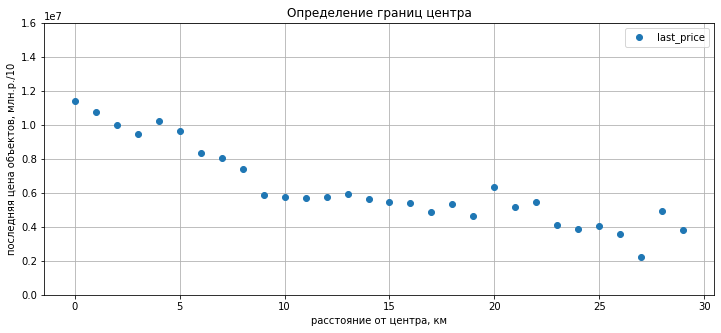

In [198]:
citycenters_km_int_spb_graph.plot(y='last_price', style='o', ylim=(0, 16000000), grid=True, figsize=(12, 5))
plt.xlabel('расстояние от центра, км')
plt.ylabel('последняя цена объектов, млн.р./10')
plt.title('Определение границ центра');

По графику виден тот же результат,  получили 8 км.

In [199]:
citycenters_km_int_spb_8km = citycenters_km_int_spb.loc[data_price_m2['citycenters_nearest_km_int'] <= 8] # выделяем по 8 км
#display(citycenters_km_int_spb_8km)
city_spb_8km_new = citycenters_km_int_spb_8km.copy()

In [200]:
print(citycenters_km_int_spb_8km.columns)

Index(['locality_name', 'rooms', 'total_area_m2', 'last_price', 'floor',
       'floors_total', 'living_area_m2', 'kitchen_area_m2', 'ceiling_height_m',
       'balcony', 'first_day_exposition', 'days_exposition',
       'citycenters_nearest_km', 'is_apartment', 'studio', 'open_plan',
       'parks_nearest_km', 'parks_around_3km', 'ponds_around_3km',
       'ponds_nearest_km', 'airports_nearest_km', 'total_images',
       'citycenters_nearest_km_int', 'locality_name_type', 'price_m2',
       'floor_type', 'area_liv_corr', 'area_kitch_corr', 'month', 'year',
       'weekday'],
      dtype='object')


площадь, цена, число комнат, высота потолков, число комнат, этаж, удалённость от центра, дата размещения объявления

In [201]:
columns_new = ['locality_name', 'rooms_8km', 'total_area_m2_8km', 'last_price_8km', 'floor',
       'floors_total', 'living_area_m2', 'kitchen_area_m2', 'ceiling_height_m_8km',
       'balcony', 'first_day_exposition_8km', 'days_exposition_8km',
       'citycenters_nearest_km_8km', 'is_apartment', 'studio', 'open_plan',
       'parks_nearest_km', 'parks_around_3km', 'ponds_around_3km',
       'ponds_nearest_km', 'airports_nearest_km', 'total_images',
       'citycenters_nearest_km_int', 'locality_name_type', 'price_m2_8km',
       'floor_type', 'area_liv_corr', 'area_kitch_corr', 'month_8km', 'year_8km',
       'weekday_8km']
citycenters_km_int_spb_8km.set_axis(columns_new, axis='columns', inplace=True)
#display(citycenters_km_int_spb_8km.head(5)) # и сразу проверим площадь, цена, число комнат, высота потолков. (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [202]:
city_spb_1 = citycenters_km_int_spb_8km.copy()
#del city_spb_1['area_kitch_corr'] # для одного столбца работает
city_spb_1.drop(['floor', 'floors_total', 'living_area_m2',
                           'kitchen_area_m2', 'balcony', 'is_apartment',
                           'studio', 'open_plan', 'parks_nearest_km', 'parks_around_3km',
                           'ponds_around_3km', 'ponds_nearest_km', 'airports_nearest_km',
                           'total_images', 'citycenters_nearest_km_int', 'locality_name_type',
                          'floor_type', 'area_liv_corr', 'area_kitch_corr'], inplace=True, axis=1)
#display(city_spb_1.head(5))

In [203]:
city_spb_2 = city_spb.copy()


In [204]:
columns_new = ['locality_name', 'rooms_all', 'total_area_m2_all', 'last_price_all', 'floor',
       'floors_total', 'living_area_m2', 'kitchen_area_m2', 'ceiling_height_m_all',
       'balcony', 'first_day_exposition_all', 'days_exposition_all',
       'citycenters_nearest_km_all', 'is_apartment', 'studio', 'open_plan',
       'parks_nearest_km', 'parks_around_3km', 'ponds_around_3km',
       'ponds_nearest_km', 'airports_nearest_km', 'total_images',
       'citycenters_nearest_km_int', 'locality_name_type', 'price_m2_all',
       'floor_type', 'area_liv_corr', 'area_kitch_corr', 'month_all', 'year_all',
       'weekday_all']
city_spb_2.set_axis(columns_new, axis='columns', inplace=True)
#display(city_spb_all.head(5)) # и сразу проверим площадь, цена, число комнат, высота потолков. (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [205]:
city_spb_2.drop(['locality_name', 'floor', 'floors_total', 'living_area_m2',
                           'kitchen_area_m2', 'balcony', 'is_apartment',
                           'studio', 'open_plan', 'parks_nearest_km', 'parks_around_3km',
                           'ponds_around_3km', 'ponds_nearest_km', 'airports_nearest_km',
                           'total_images', 'citycenters_nearest_km_int', 'locality_name_type',
                          'floor_type', 'area_liv_corr', 'area_kitch_corr'], inplace=True, axis=1)
display(city_spb_2.head(5))

,rooms_all,total_area_m2_all,last_price_all,ceiling_height_m_all,first_day_exposition_all,days_exposition_all,citycenters_nearest_km_all,price_m2_all,month_all,year_all,weekday_all
0,3,108.00,13000000.00,2.70,2019-03-07,NaN,16.03,120370.37,3,2019,3
2,2,56.00,5196000.00,2.65,2015-08-20,558.00,13.93,92785.71,8,2015,3
4,2,100.00,10000000.00,3.03,2018-06-19,121.00,8.10,100000.00,6,2018,1
7,2,71.60,7915000.00,2.65,2019-04-18,NaN,11.63,110544.69,4,2019,3
9,3,61.00,5400000.00,2.50,2017-02-26,289.00,15.01,88524.59,2,2017,6


In [206]:
city_spb_all = city_spb_2.join(city_spb_1)
#display(city_spb_all)

In [207]:
city_spb_all[['rooms_8km', 'rooms_all', 'total_area_m2_8km', 'total_area_m2_all', 'last_price_8km',
              'last_price_all', 'ceiling_height_m_8km', 'ceiling_height_m_all', 'first_day_exposition_8km',
              'first_day_exposition_all', 'days_exposition_8km', 'days_exposition_all',
              'citycenters_nearest_km_8km', 'citycenters_nearest_km_all', 'price_m2_8km', 'price_m2_all']].describe()

,rooms_8km,rooms_all,total_area_m2_8km,total_area_m2_all,last_price_8km,last_price_all,ceiling_height_m_8km,ceiling_height_m_all,days_exposition_8km,days_exposition_all,citycenters_nearest_km_8km,citycenters_nearest_km_all,price_m2_8km,price_m2_all
count,2888.00,14477.00,2888.00,14477.00,2888.00,14477.00,2888.00,14477.00,2470.00,12697.00,2888.00,14435.00,2888.00,14477.00
mean,2.83,2.14,85.57,61.41,9537268.81,6459016.30,2.85,2.69,241.62,178.65,4.70,11.98,114065.02,105343.85
std,1.45,1.12,48.96,33.72,5482941.14,3889454.87,0.27,0.19,270.93,220.59,1.74,4.69,23663.86,21000.95
min,0.00,0.00,13.00,13.00,1686000.00,1190000.00,2.00,2.00,3.00,1.00,0.21,0.21,41911.76,41911.76
25%,2.00,1.00,55.00,41.20,6200000.00,4140000.00,2.65,2.60,60.00,42.00,3.57,9.23,95404.21,90000.00
50%,3.00,2.00,75.00,53.50,8200000.00,5300000.00,2.70,2.65,137.50,93.00,4.77,12.55,112485.29,102537.31
75%,3.00,3.00,100.33,71.00,11213023.00,7450000.00,3.00,2.70,332.00,224.00,5.91,15.09,132911.39,118965.52
max,19.00,19.00,590.00,590.00,65000000.00,65000000.00,3.50,3.50,1512.00,1553.00,8.00,29.49,160714.29,160714.29


Можно комфортно сравнить показатели. <br/>Объекты в радиусе 8км продаются медленнее 93 дня против 137.50 по медианному значению и они значимо дороже 8200000.00  против 5300000.00 по медианному значению <br/>
Среднее количество комнат в радусе 8 км превышает общую цифру и даже высота потолков больше.<br/>
Аналогичный тренд и по общей площади и по цене кв.метра.

0.8971903384485151


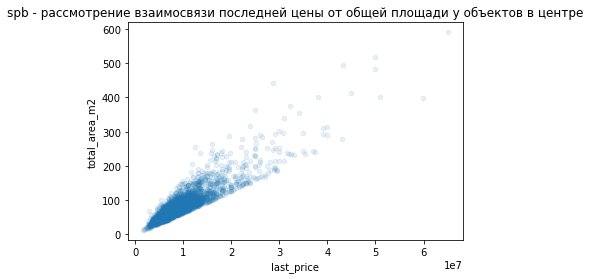

In [208]:
city_spb_8km_new.plot(x='last_price', y='total_area_m2', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи последней цены от общей площади у объектов в центре')
print(city_spb_8km_new['last_price'].corr(city_spb['total_area_m2'])) # посчитаем коэффициент Пирсона
#0.9036876570474799

Чуть поменьше зависимость, было 0.9036876570474799

0.6545402838703683


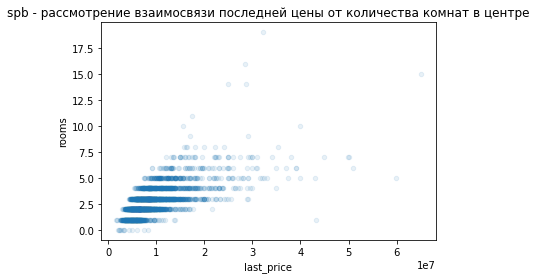

In [209]:
city_spb_8km_new.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи последней цены от количества комнат в центре')
print(city_spb_8km_new['last_price'].corr(city_spb['rooms'])) # посчитаем коэффициент Пирсона
#0.6483233099794677

А здесь наоборот, чуть получше. Надо бы посмотреть подробнее, если необходимость будет.

-0.12504738914717145


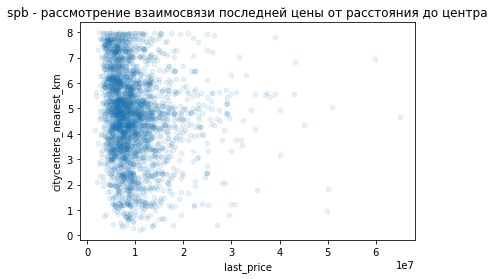

In [210]:
city_spb_8km_new.plot(x='last_price', y='citycenters_nearest_km', kind='scatter', alpha=0.1)
plt.title('spb - рассмотрение взаимосвязи последней цены от расстояния до центра')
print(city_spb_8km_new['last_price'].corr(city_spb['citycenters_nearest_km'])) 
#-0.37218310649525477

Тут тоже слабая обратная зависимость

In [211]:
month_name_stat = city_spb_8km_new.groupby('month').agg(
    month_count=('last_price','count'), month_median=('last_price','median'), month_mean=('last_price','mean'))
month_name_stat = month_name_stat.sort_values('month', ascending = True)
display(month_name_stat)

#month_count 	month_median 	month_mean
#month 			
#1 	843 	5446075.00 	6629059.54
#2 	1604 	5300000.00 	6457108.61
#3 	1569 	5400000.00 	6511946.02
#4 	1482 	5301202.50 	6423072.37
#5 	797 	5200000.00 	6517704.81
#6 	1051 	5100000.00 	6212021.35
#7 	1065 	5200000.00 	6558815.60
#8 	1106 	5225000.00 	6218408.91
#9 	1212 	5350000.00 	6640994.49
#10 	1341 	5100000.00 	6373528.75
#11 	1449 	5300000.00 	6406579.09
#12 	958 	5600000.00 	6639226.00

,month_count,month_median,month_mean
month,,,
1,171,8400000.00,10285904.53
2,311,8400000.00,9933079.13
3,311,8500000.00,9788400.54
4,262,7975000.00,9283380.13
5,165,7875000.00,9063348.21
6,233,7900000.00,9116255.10
7,222,8497500.00,9946537.03
8,213,7800000.00,8894201.46
9,253,8822000.00,9744920.16


Здесь тоже декабрь и январь выделяются и по стоимости  и малым количество объектов. Впрочем и май как-то мал по количеству объектов.

In [212]:
year_name_stat = city_spb_8km_new.groupby('year').agg(
    year_count=('last_price','count'), year_median=('last_price','median'), year_mean=('last_price','mean'))
year_name_stat = year_name_stat.sort_values('year', ascending = True)
display(year_name_stat)
#year_count 	year_median 	year_mean
#year 			
#2014 	77 	8500000.00 	10240511.30
#2015 	763 	5830007.00 	7310725.34
#2016 	1711 	5250000.00 	6465456.94
#2017 	5119 	5100000.00 	6303578.20
#2018 	4995 	5260000.00 	6335709.18
#2019 	1812 	5600000.00 	6712635.32

,year_count,year_median,year_mean
year,,,
2014,16,11364000.00,13728437.75
2015,262,8594500.00,10097095.17
2016,405,8350000.00,9446657.63
2017,1038,7995000.00,9497378.99
2018,882,8100000.00,9264149.39
2019,285,8300000.00,9906606.66


И здесь идет отсылка к событиям 2014-го, но мало количество объектов.

<a name="chapter_4"></a>
## 4. Выводы

Промежуточные выводы уже сделаны выше при рассмотрении всех параметров в отдельности.

Основные факторы для определения рыночной стоимости объекта недвижимости:
- цена объекта за кв.м    
- общая площадь квартиры
- расстояние до центра города
- факторы типа числа комнат, основные продажи идут по более дешевым квартирам, особенно однокомнатным

Средние сроки продажи квартиры порядка 6 месяцев, в центре цифры больше, но там и более дорогая цена.

Учитывая большое количество ошибок при ручном вводе данных, целесообразно максимально уменьшить для клиента возможность ошибки за счет предоставления по каждому параметру ограниченного числа полей для выбора, уже заранее определенных по величинам, типа высоты потолков.

И увеличить число автоматически подставляемыхх параметров, типа количества парков или расстояния до парков...


<a name="chapter_4"></a>
**4. Выводы**

**4.1.** Первичное рассмотрение начального датасета. <br/>
4.1.1 Всего 23699 строк, 22 столбца. Разделители - `\t` и судя по отсутствию столбцов с непонятными названиями - ошибок с разделителями нет. Названия столбцов без пропусков и артефактов,  один cityCenters_nearest с символом в верхнем регистре.<br/><br/>
4.1.2. Найдено всего 2 строки, дублирующие друг друга, несовпадение по дате.
Без 'total_images', 'last_price' таких возможных дубликатов еще 30. Количество достаточно малое на общем объеме. Принято решение оставить все в базе, потому как в ней отсутствуют поля (паспортные данные или кадастровые данные), позволяющие достоверно идентифицировать дубликаты.<br/><br/>
4.1.3. Просится изменение названия столбцов, там где указывается расстояние или площадь. Принято решение добавить в название km и пересчитать в километры. Ко второй группе столбцов добавлено m2. 
Расположение столбцов тоже изменено, аналогично, как делает сам проект Яндекс.Недвижимости, смотрим https://realty.yandex.ru/moskva/kupit/kvartira/<br/><br/>
4.1.4. В некоторых столбцах есть заведомо некоррректные данные. living_area, равная 2 кв.м. или kitchen_area равная 1.3 кв.м. или объекты, находящиеся по данным прямо в аэропорту или парке. И это далее было проверено по каждому столбцу.<br/><br/>
4.1.5. Принято решение first_day_exposition  перевести на тип данных, более подходящий для работы с временными данными.<br/><br/>

**4.2.** Изучение и предобработка данных<br/>
4.2.1. Сделаны изменения по п.4.1.3.<br/><br/>
4.2.2. По столбцу 'locality_name' (герафическая привязка объекта) все названия переведены в строчный регистр. 
Обнаружены пропущенные данные в количестве 49, которые были удалены - нет смысла в рассмотрении объектов без указания географической привязки. Произведена замена символов 'ё' на 'е' и далее принято решение об очистке названий объектов от типа:<br/>
городской поселок<br/>
деревня<br/>
коттеджный поселок<br/>
поселок<br/>
поселок городского типа<br/>
поселок при железнодорожной станции<br/>
поселок станции<br/>
садоводческое некоммерческое товарищество<br/>
садовое товарищество<br/>
село<br/>
Все они через лемматизацию и категоризацию выведены в дополнительный столбец 'locality_name_type'.
Эти действия позволили сократить количество уникальных объектов в столбце 'locality_name' с 365 до 305. Осталось необычное название деревни хапо-ое, но проверка показала, что это существующее название.
<br/><br/>
4.2.3. 'rooms' - количество комнат у объекта, обнаружено 197 объектов с нулевым значение. Выяснено, что это все объекты - или студии или свободная планировка.
Принято решение оставить этот 0 в таблице и при необходимости подсчетов подставить 1 или просто не будем учитывать в подсчетах этот класс объектов.<br/><br/>
4.2.4. 'total_area_m2' — площадь квартиры в квадратных метрах (м?), найдены объекты с площадью от 12 до 900 кв.м.
<br/><br/>
4.2.5 'last_price' — цена на момент снятия с публикации, найдены объекты с ценой от 12,190 тыс.р. до 763 млн.р. Принято решение на основе существующих данных создать новый столбец 'price_m2', цена 1 кв.м. общей площади.<br/>
Разброс значений в новом столбце оказался равен от 111,83 р. до 1,9 млн.р. за 1 кв.м. Гистограмма  данных этого столбца имеет красивое и нормальное распределение. И рыночная цена за 1 кв.м. означает то, что у объекта в целом вполне рыночные характеристики. Поэтому именно по данному параметру принято решение рассмаривать далее все объеты и ограничит границы рассмотрения не квартилями, а границами между 5% и 95%.<br/><br/>
4.2.6. 'floor' — этаж и 'floors_total' — всего этажей в доме, обнаружено 85 пропущенных значений. Большинство этих строк и без данных столбца 'ceiling_height_m', принято решение удалить данные  строки -  они далее участвуют в расчетах.<br/>
Изменили тип данных в 'floors_total' и 'floor' на uint8 для сокращения занимаемой памяти.<br/>
Создан дополнительный столбец 'floor_type' со значениями первый, последний или другой, чтобы исследовать влияние первого или последнего этажа на судьбу объекта.<br/>
Проверены объекты с домами высотой от 27 этажей и до 60. Но данные не позволили что-то сказать о достоверности такой высоты домов.<br/><br/>
4.2.7. 'living_area_m2' — жилая площадь в квадратных метрах(м?), разброс значений от 2 до 409,70 кв.м. Найдено 1865 пропущенных строк.  Рассмотрение именно этих строк не выявило причину, похоже, что клиент просто не ввел данных. Рассмотрели взаимосвязь размеров жилой площади от размера общей площади, высокий коэффициент Пирсона 0.93977. Наличие взаимосвязи позволяет посчитать вероятный размер площади жилой площади, исходя из общей площади объекта. Тем более, что обнаружено много вариантов, где сумма жилой площади и площади кухни больше общей площади объекта, что как-то неправильно. И наоборот, когда сумма значимо меньше. Для более точной проверки создан новый столбец коэффициента area_liv_corr для дополнительного исследования. Чем меньше площадь, тем точность коэффициента падает - но такая замена, на мой взгляд, вполне возможна.<br/>
Найдено два характерных пика на гистрограмме распределения занчений, примерно 18 и 32 кв.м. Причем и в Санкт-Петербурге и вне его. Основная версия - эти два пика объясняются разными сериями постройки домов. Если бы был год строительства дома, можно было бы попытаться оценить правоту данной идеи.<br/><br/>
4.2.8. 'kitchen_area_m2' — площадь кухни в квадратных метрах (м?), размеры от 1.3 до 112 кв.м. Пропущенных значений - 2222. Здесь тоже обнаружена корреляция между размером площади кухни и общей площади, коэффициент Пирсона - 0.609.
Для исследования и возможной замены создан новый столбец 'area_kitch_corr'.<br/><br/>
4.2.9. 'ceiling_height_m' — высота потолков (м), разброс значений от 1 до 100м. Пропущенных значений - 9084. Много ошибок при вводе. Неправильная постановка запятых. Судя по посчитанным на объектах определенной этажности средним и медианных значениям, разброс реальных значений не так уж и велик, всего несколько значений.
Лучше выдавать клиентам несколько значений на выбор и дать опцию произвольного значения, в случае, если его нет в стандартных.<br/>
Вначале заменили все значения выше 3,5м и ниже 2м на медианное. А потом заменили отсутствующие по медианному общему значению. Учитывая, что мы не совсем знаем достоверную медианную для каждой серии домов разной этажности (есть артефакты по домам в 33 и 36 этажей), не стали заменить отсутствующие на соответствующие данные по этажности дома по медианному значению.<br/><br/>
4.2.10. 'balcony' — число балконов, разброс значений от 0 до 3. Пропущено 11475 значений. Учитывая, что это высокий процент 48,7%, версия - непроставленные клиентом значения. Поэтому нет особого смысла заменять эти данные на нули. И хорошо бы вначале понять, насколько этот показатель значим для продажи.
<br/><br/>
4.2.11 'days_exposition' — сколько дней было размещено объявление (от публикации до снятия), разброс значений от 1 до 1580. Пропущенных значений - 3171.<br/><br/> 
4.2.12. 'first_day_exposition' — дата публикации, от 2014-11-27 00:00:00 до 2019-05-03 00:00:00. Заменен тип данных на datetime и добавлены новые столбцы - день недели 'weekday', месяц 'month' и год 'year' публикации объявления.<br/><br/>
4.2.13. 'citycenters_nearest_km' — расстояние до центра города (м), разброс значений от 0.18 до 65.97. Пропущенных значений - 5501. Судя по всему, центром считается только центр Санкт-Петербурга, вне его расстояние до центра только более 17 км. В самом Санкт-Петербурге пропущенных значений только - 61.<br/><br/>
4.2.14. 'is_apartment' — апартаменты (булев тип), всего 50 объектов, разброс площади апартаментов от 20.10 до  507 кв.м. Пропущенных значений - 20805. <br/><br/>
4.2.15. 'studio' — квартира-студия (булев тип), всего 146 объектов, площадь кухни 0 кв.м.<br/><br/>
4.2.16. 'open_plan' — свободная планировка (булев тип), всего 67 объектов.<br/><br/>
4.2.17. 'parks_nearest_km' -  разброс значений от 0 до  3,19 км. Пропущенных значений - 15535. Интересно, что 6 объектов на расстоянии 10м от парка.<br/><br/>
4.2.18. 'parks_around_3km' -  разброс значений от 0 до 3. Пропущенных значений - 5500. <br/><br/>
4.2.19. 'ponds_around_3km' -  разброс значений от 0 до 3. Пропущенных значений - 5500.  <br/><br/>
4.2.20. 'ponds_nearest_km' -  разброс значений от 0,01 до  1,34 км. Пропущенных значений - 14529. <br/><br/>
4.2.21. 'airports_nearest_km' -  разброс значений от 0 до  54,78 км. Пропущенных значений - 5524. Интересно, что 1 объект находится по данным прямо в аэропорту.<br/><br/>
4.2.22. 'total_images' -  разброс значений от 0 до  50 шт. <br/><br/>
**4.3. Исследовательский анализ данных**<br/>
4.3.1. Получен список 10 населённых пунктов с наибольшим числом объявлений. Показаны все основные медианные значения по каждой географической локации. Из них:<br/>
санкт-петербург - 102537.31 медианное значение цены за кв.м, самая высокая стоимость жилья<br/>
выборг - 59259.26 медианное значение цены за кв.м, самая низкая стоимость жилья.<br/>
И данные показывают, что это довольно разные ценовые рынки, нет особого смысла сравнивать их далее вместе.<br/><br/>
4.3.2. Исследовано количество дней экспозиции в Санк-Петербурге:<br/>
В 50% случаев количество дней экспозиции составляло порядка 3 месяца (93 дней).<br/>
В 25% случаев количество дней экспозиции составляло и это можно считать быстрым процессом.<br/>
И хотя в 5% количество дней экспозиции составляло всего 8 дней, не вижу здесь никаких мошеннических действий.<br/>
Если объект не продается дольше 224 дней стоит задуматься, это признак долгой продажи.<br/>
И продаются, в основном - дешевые объекты.<br/>
На гистограмме обнаружены пики, первый пик на уровне 1 недели, второй на уровне 30 дней, третий на уровне 45 дней, четвертый на уровне 60 дней, пятый на уровне 90 дней. Цифры круглые.<br/>
Даты постановки этих объектов в базу в целом не совпадают, не похоже на разовые групповые операции.<br/>
Основная версия, что это действие объясняется тактической попыткой обнуления срока времени продажи (экспозиции) объекта агенствами недвижимости, которые являются операторами этих объектов. Думаю, что после снятия с продажи они снова поставят объекты на продажу и они будут, как новые. У покупателей же высокий срок непродажи объекта должен вызывать некоторое уже изначальное недоверие к объекту. Вот агенства и решают данную проблему.<br/>
days_exposition - получается, что это правильное название столбца, аккуратное. Это количество дней экспозиции данного объекта, что не равно, в целом, количеству дней для его продажи...<br/>
В Мурино объекты недвижимости продаются несколько быстрее, чем в Сакт-Петербурге, если смотреть в объемах продажи по количеству.<br/><br/>
4.3.3. Проведено исследование факторов, которые больше всего влияют на стоимость квартиры. 
Обнаружена сильная взаимосвязь значения общей площади и последней цены у объектов, коэффициент Пирсона у объектов в Санкт-Петербурге  - 0.90368, у объектов в Мурино - 0.8647.<br/><br/>
4.3.4. Есть взаимосвязь стоимости квартиры и количества комнат, немного слабее, чем в предыдущем варианте. Коэффициент Пирсона у объектов в Санкт-Петербурге  - 0.6483, у объектов в Мурино - 0.7634. В Мурино количеству комнат придают больше значения, чем в Сакт-Петербурге.<br/><br/>
4.3.5. Зависимость стоимости квартиры от удаленности от центра. В Санкт-Петербурге Прямой положительной зависимости по всем квартирам не наблюдается. Слабая обратная зависимость. Коэффициент Пирсона у объектов в Санкт-Петербурге  - (-0.3721).<br/><br/>
4.3.6. Взаимосвязи стоимости квартиры от даты размещения, месяца и года в целом не наблюдается. Хотя январь и декабрь выше по медианной цене. Возможная рричина в уменьшении объектов, поданных в этих месяцах. Версия - В Санк-Петербурге их в эти месяцы пытаются активно сдать в аренду?<br/><br/>
4.3.7. Зависимость стоимости квартиры от того, на каком этаже расположена квартира: первом, последнем или другом. В Санкт-Петербурге можно сказать, что последний этаж по уровню медианных цифр выше объектов с первым этажом. А по средней цифре даже выше и остальных этаже, что несколько удивительно. Можно дополнительно поискать причину, если необходимо.
А в Мурино последний этаж лидер по всем показателям, хотя колияество таких объектов совсем мало.
<br/><br/>
4.3.8. Была определена граница центра Санкт-Петербурга по величине радиуса от центра города, где значимо меняется стоимость объектов, это 8 км от центра.<br/>
Создана таблица, где совмещены основные показатели в центре и в целом по городу.<br/>
Можно комфортно сравнить показатели.<br/>
Объекты в радиусе 8км продаются медленнее 93 дня против 137.50 по медианному значению и они значимо дороже 8200000.00 против 5300000.00 по медианному значению.<br/>
Среднее количество комнат у объектов в радусе 8 км превышает общую цифру и даже высота потолков больше.<br/>
Аналогичный тренд и по общей площади и по цене кв.метра.<br/>
Остальные тренды похожи.<br/><br/>
**4.4. Необходимы улучшения по интерфейсу приема данных от клиента в проекте**<br/>
4.4.1. Учитывая большое количество ошибок при ручном вводе данных, целесообразно максимально уменьшить для клиента возможность ошибки за счет предоставления по каждому параметру ограниченного числа полей для выбора, уже заранее определенных по существующим величинам, типа высоты потолков.<br/><br/>
4.4.2. Увеличить число автоматически подставляемыхх параметров, типа количества парков или расстояния до парков...